In [147]:
library(repr)
options(repr.plot.width=18, repr.plot.height=9)
library(ggthemes)
library(bayesplot)
library(tidyverse)

# 二项回归

### 建模大猩猩亲社会性

In [2]:
library(rethinking)
data(chimpanzees)
d <- chimpanzees
detach(package:rethinking, unload = T)
library(brms)
rm(chimpanzees)
head(d)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

Loading required package: dagitty

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent


Loading required package: Rcpp

Loading 'brms' package (version 2.12.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo


The following object is masked from ‘package:stats’:

    ar




actor recipient condition block trial prosoc_left chose_prosoc pulled_left
1 1     NA        0         1      2    0           1            0          
2 1     NA        0         1      4    0           0            1          
3 1     NA        0         1      6    1           0            0          
4 1     NA        0         1      8    0           1            0          
5 1     NA        0         1     10    1           1            1          
6 1     NA        0         1     12    1           1            1

- actor : 受试猩猩名
- recipient : 对面猩猩编号 (NA for partner absent condition)
- condition : 对面无猩猩 (0), 对面有猩猩 (1)
- block : 主体×对面，均只出现1trial (each actor x each recipient 1 time)
- trial : 试次数，每个猩猩72个trial(by chimp = ordinal sequence of trials for each chimp, ranges from 1-72; 对面猩猩不存在的condition优先编码)
- prosocial_left : 亲社会推杆选项在左时为1
- chose_prosoc : 选择了亲社会选项为1 (0 = 1/0 or 0/1 option, 1 = 1/1 or 0/0 option)
- pulled_left : 实际推杆方向 (1 = left, 0 = right)

全模型：
\begin{aligned} { pulled left }_{i} & \sim \text { Binomial }\left(1, p_{i}\right) \\ \operatorname{logit}\left(p_{i}\right) &=\alpha+\left(\beta_{P}+\beta_{P C} C_{i}\right) P_{i} \\ \alpha & \sim \text { Normal }(0,10) \\ \beta_{P} & \sim \text { Normal }(0,10) \\ \beta_{P C} & \sim \text { Normal }(0,10) \end{aligned}

## Logistic回归：

### 截距模型

\begin{array}{c}\text { pulled left }_{i} \sim \text { Binomial }\left(1, p_{i}\right) \\ \text { logit }\left(p_{i}\right)=\alpha \\ \quad \alpha \sim \operatorname{Normal}(0,10)\end{array}  

在`brm()`的`formula`语法中，formula左侧的`|`表示我们有关于准则的额外补充信息。在本案例中，该信息是每个`pulled_left`值对应一个试次（即`trials(1)`），其本身对应于统计公式`n=1`，即每个condition(主体×对面≠对面×主体)只测一次。

In [24]:
b10.1 <-
  brm(data = d, family = binomial(link=logit),
      pulled_left | trials(1) ~ 1,
      prior(normal(0, 10), class = Intercept),
      seed = 10)

b10.1b <-
  update(b10.1, family = bernoulli(),
      pulled_left ~ 1)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling




SAMPLING FOR MODEL '38d9501620221cc749776c6f5cd000b5' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.254366 seconds (Warm-up)
Chain 1:                0.24774 seconds (Sampling)
C

The desired updates require recompiling the model

Compiling the C++ model

Start sampling




SAMPLING FOR MODEL 'b24325c23c7f5f51a1d81b155e4a30c8' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.100464 seconds (Warm-up)
Chain 1:                0.099612 seconds (Sampling)


使用`fixef()`来获取有关截距的信息

In [25]:
print(b10.1)
print(b10.1b)

 Family: binomial 
  Links: mu = logit 
Formula: pulled_left | trials(1) ~ 1 
   Data: d (Number of observations: 504) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.32      0.09     0.13     0.50 1.00     1400     2002

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).
 Family: bernoulli 
  Links: mu = logit 
Formula: pulled_left ~ 1 
   Data: d (Number of observations: 504) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.32      0.09     0.15     0.50 1.00     1403     1803

Sam

二项与伯努利等效

In [27]:
library(tidyverse)
 
fixef(b10.1) %>%
  round(digits = 2)

Estimate Est.Error Q2.5 Q97.5
Intercept 0.32     0.09      0.13 0.5

`brms::inv_logit_scaled()`函数替代书中的`logistic()`

In [36]:
c(.13, .5) %>%
  inv_logit_scaled()   #得到 95% 置信区间

[1] 0.5324543 0.6224593

In [6]:
fixef(b10.1) %>%
  inv_logit_scaled()

Estimate  Est.Error Q2.5      Q97.5    
Intercept 0.5785745 0.5231442 0.5333637 0.6224224

拉动左边杆的 MAP 概率为 `logistic (0.32) ≈ 0.58`, 相应的 95% 置信区间为 0.53 到 0.62

### 单因素模型/交互效应模型

In [81]:
b10.2 <-
  brm(data = d, family = binomial,
      pulled_left | trials(1) ~ 1 + prosoc_left,
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b)),
      seed = 10)

b10.3 <-
  update(b10.2,
         newdata = d,
         formula = pulled_left | trials(1) ~ 1 + prosoc_left + condition:prosoc_left)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling




SAMPLING FOR MODEL 'd5bacc577b453cc490f4aef086ca64cc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000163 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.63 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.411759 seconds (Warm-up)
Chain 1:                0.425662 seconds (Sampling)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Start sampling




SAMPLING FOR MODEL 'd5bacc577b453cc490f4aef086ca64cc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000112 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.582359 seconds (Warm-up)
Chain 1:                0.591865 seconds (Sampling)

单因素模型WAIC小于包含交互的模型

In [32]:
b10.1 <- add_criterion(b10.1, "waic")
b10.1b <- add_criterion(b10.1b, "waic")
b10.2 <- add_criterion(b10.2, "waic")
b10.3 <- add_criterion(b10.3, "waic")

w <- loo_compare(b10.1, b10.2, b10.3, b10.1b, criterion = "waic")

print(w, simplify = F)

Warning message:
“Not all models have the same y variable. ('yhash' attributes do not match)”


       elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic   se_waic
b10.2     0.0       0.0  -340.4       4.7          2.1    0.0     680.7    9.4 
b10.3    -0.9       0.4  -341.2       4.7          3.1    0.1     682.4    9.5 
b10.1b   -3.6       3.1  -344.0       3.6          1.0    0.0     688.0    7.2 
b10.1    -3.7       3.1  -344.0       3.5          1.1    0.0     688.1    7.0 


`cbind()` trick to convert the differences from the elpd metric to the WAIC metric.

In [33]:
cbind(waic_diff = w[, 1] * -2,
      se        = w[, 2] *  2) %>% 
  round(digits = 2)

waic_diff se  
b10.2  0.00      0.00
b10.3  1.74      0.84
b10.1b 7.24      6.21
b10.1  7.34      6.20

### 模型比较

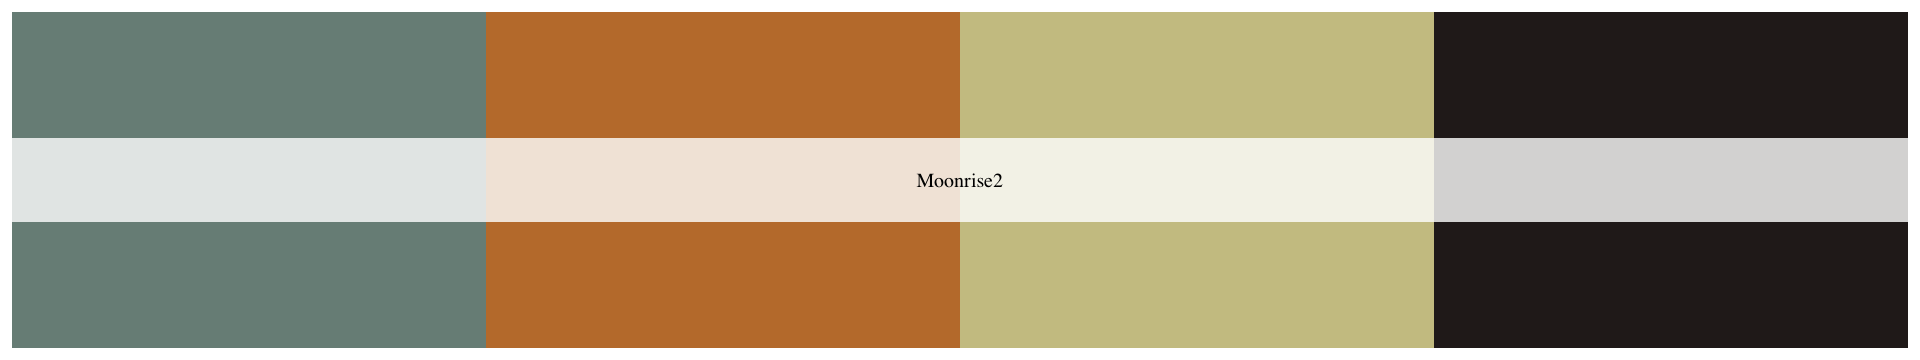

In [34]:
# install.packages("wesanderson", dependencies = T)
library(wesanderson)

library(repr)
options(repr.plot.width=16, repr.plot.height=3)

wes_palette("Moonrise2")

In [35]:
wes_palette("Moonrise2")[1:4]

[1] "#798E87" "#C27D38" "#CCC591" "#29211F"

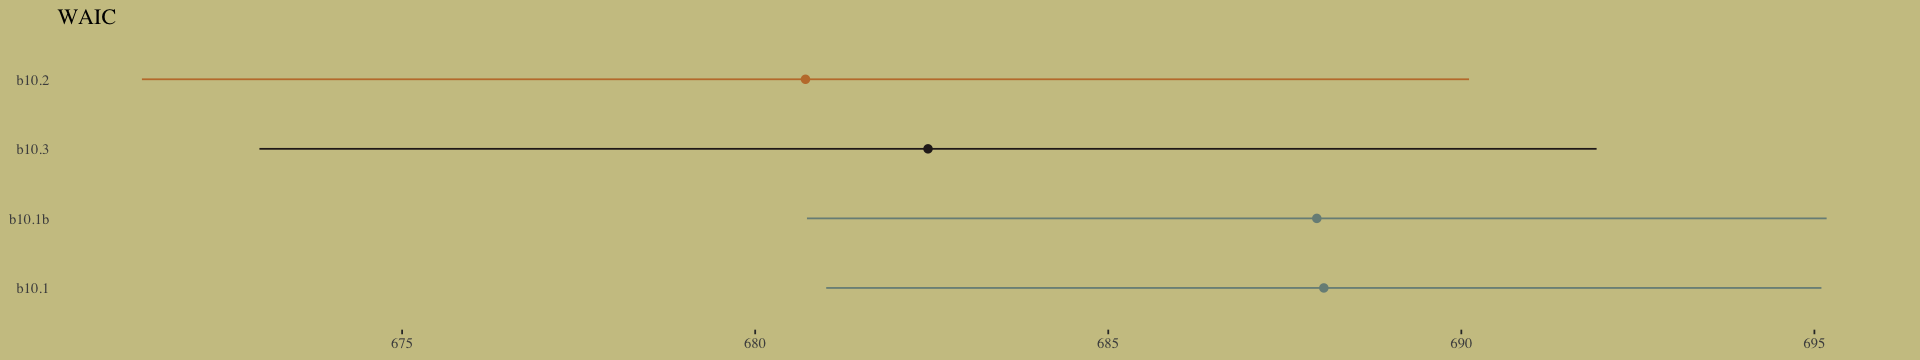

In [45]:
library(ggthemes)
library(bayesplot)

theme_set(theme_default() + 
            theme_tufte() +
            theme(plot.background = element_rect(fill  = wes_palette("Moonrise2")[3],
                                                 color = wes_palette("Moonrise2")[3])))


w %>%
  data.frame() %>% 
  rownames_to_column(var = "model") %>% 
  
  ggplot() +
  geom_pointrange(aes(x = reorder(model, -waic), y = waic,
                      ymin = waic - se_waic,
                      ymax = waic + se_waic,
                      color = model),
                  shape = 16) +
  scale_color_manual(values = wes_palette("Moonrise2")[c(1, 1, 2, 4)]) +
  coord_flip() +
  labs(x = NULL, y = NULL,
       title = "WAIC") +
  theme(axis.ticks.y    = element_blank(),
        legend.position = "none")

预期的交互模型WAIC并非最小，即含有`condition`变量的模型的表现并不是最好的，但对应的 WAIC 权重确实大于 25%

In [46]:
model_weights(b10.1, b10.2, b10.3, b10.1b, 
              weights = "waic")

b10.1      b10.2      b10.3     b10.1b 
0.01730206 0.67926181 0.28525238 0.01818375

交互效应对应的估计`prosoc_left:condition`为负，相应的后验区间很宽[-0.65, 0.41]，并且包含0。因此不论信息法则对几个模型的排序如何，这里的模型估计表明目标猩猩并不在意对面是否坐着另外一个同伴。但是它们确实更倾向于做出亲社会的选择（见`prosoc_left`的参数估计）

In [15]:
print(b10.3)

 Family: binomial 
  Links: mu = logit 
Formula: pulled_left | trials(1) ~ prosoc_left + prosoc_left:condition 
   Data: d (Number of observations: 504) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
                      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                 0.05      0.13    -0.20     0.29 1.00     3601
prosoc_left               0.63      0.23     0.19     1.08 1.00     2315
prosoc_left:condition    -0.11      0.27    -0.65     0.41 1.00     2407
                      Tail_ESS
Intercept                 2650
prosoc_left               2422
prosoc_left:condition     2553

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [51]:
fixef(b10.3)

Estimate    Est.Error Q2.5       Q97.5    
Intercept              0.05172044 0.1265932 -0.1956535 0.3034155
prosoc_left            0.61392136 0.2247316  0.1928395 1.0589448
prosoc_left:condition -0.10884469 0.2708655 -0.6243603 0.4146143

In [37]:
exp(fixef(b10.3)[2])   #prosoc_left

[1] 1.869059

逻辑模型中相对效应的度量是似然比的变化。你可以通过对参数估计进行指数变换得到相应的似然比。此处似然比是事件发生概率和不发生概率的比值，即1/(1-p)。当`prosoc_left`的取值从 0 变成 1, 拉动左边拉杆对应的对数似然比$\log{\frac{p}{1-p}}$会增加 0.61（对应的 MAP 估计），可以将此看成拉动左边杆对应似然比增长为原来的 `exp(0.63)≈1.87` 倍。这意味着似然比$\frac{p}{1-p}$增加了87%。

给定截距估计值为4，在其他所有条件相同的情况下，拉动的概率将接近1

In [17]:
inv_logit_scaled(4)

[1] 0.9820138

加上系数给出更高估值。尽管似然比增加了 84%，对应的概率尺度的变化不到 1%。类似的，如果截距是负的，并且绝对值很大的话，拉动左边杆的概率接近于 0（即1-p极大）

In [57]:
inv_logit_scaled(4 + fixef(b10.3)[2])

[1] 0.9901844

使用`brms::pp_average()`代替`rethinking::ensemble()`得到不同模型的混合预测

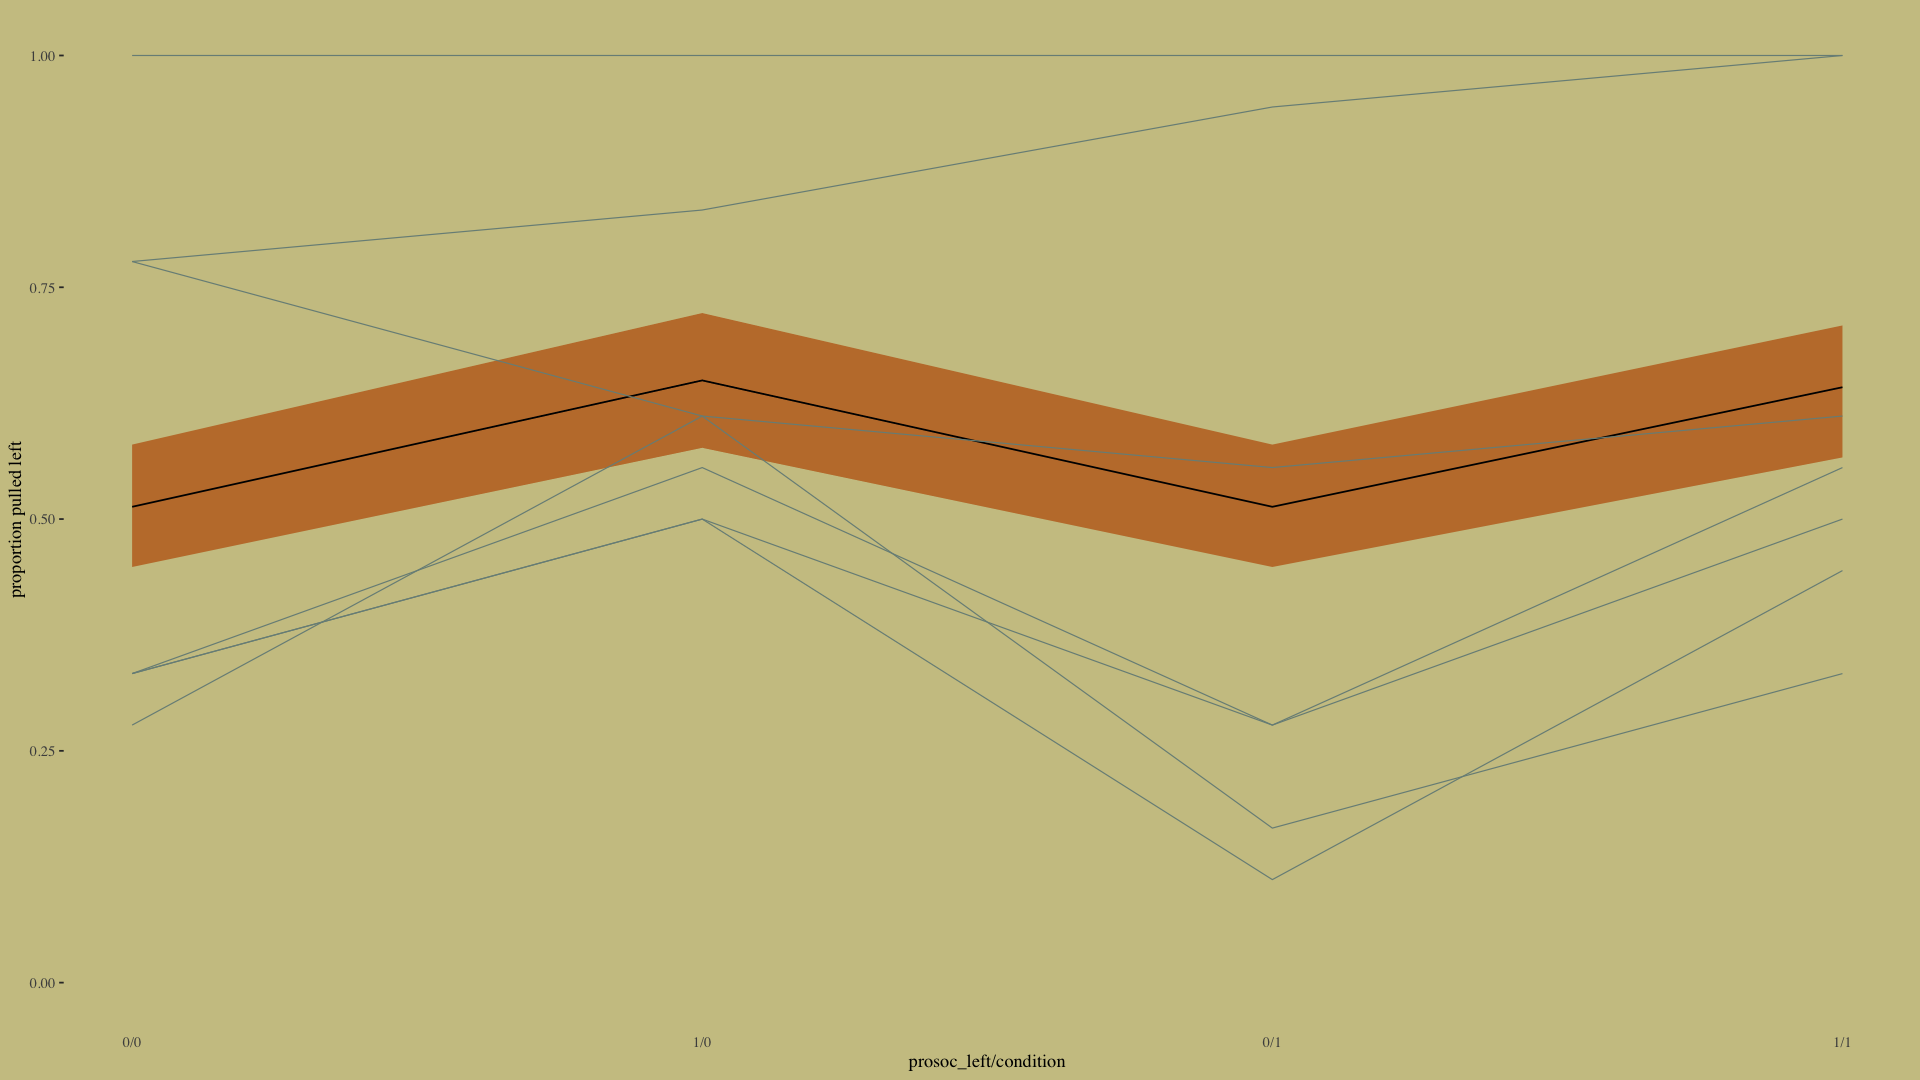

In [58]:
# the combined `fitted()` results of the three models weighted by their WAICs
ppa <- 
  pp_average(b10.1, b10.2, b10.3,
             weights = "waic",
             method = "fitted") %>%
  as_tibble() %>% 
  bind_cols(b10.3$data) %>% 
  distinct(Estimate, Q2.5, Q97.5, condition, prosoc_left) %>% 
  mutate(x_axis = str_c(prosoc_left, condition, sep = "/")) %>%
  mutate(x_axis = factor(x_axis, levels = c("0/0", "1/0", "0/1", "1/1"))) %>%   #(0:右；1：左)/(0：控制组；1：对照组)
  rename(pulled_left = Estimate)

# the empirically-based summaries
d_plot <-
  d %>%
  group_by(actor, condition, prosoc_left) %>%
  summarise(pulled_left = mean(pulled_left)) %>%
  mutate(x_axis = str_c(prosoc_left, condition, sep = "/")) %>%
  mutate(x_axis = factor(x_axis, levels = c("0/0", "1/0", "0/1", "1/1")))

# the plot
ppa %>% 
  ggplot(aes(x = x_axis)) +
  geom_smooth(aes(y = pulled_left, ymin = Q2.5, ymax = Q97.5, group = 0),
              stat = "identity",
              fill = wes_palette("Moonrise2")[2], color = "black", 
              alpha = 1, size = 1/2) +
  geom_line(data = d_plot,
            aes(y = pulled_left, group = actor),
            color = wes_palette("Moonrise2")[1], size = 1/3) +
  scale_x_discrete(expand = c(.03, .03)) +
  coord_cartesian(ylim = 0:1) +
  labs(x = "prosoc_left/condition",
       y = "proportion pulled left") +
  theme(axis.ticks.x = element_blank())

Warning message:
“Only one chain in 'x'. This plot is more useful with multiple chains.”


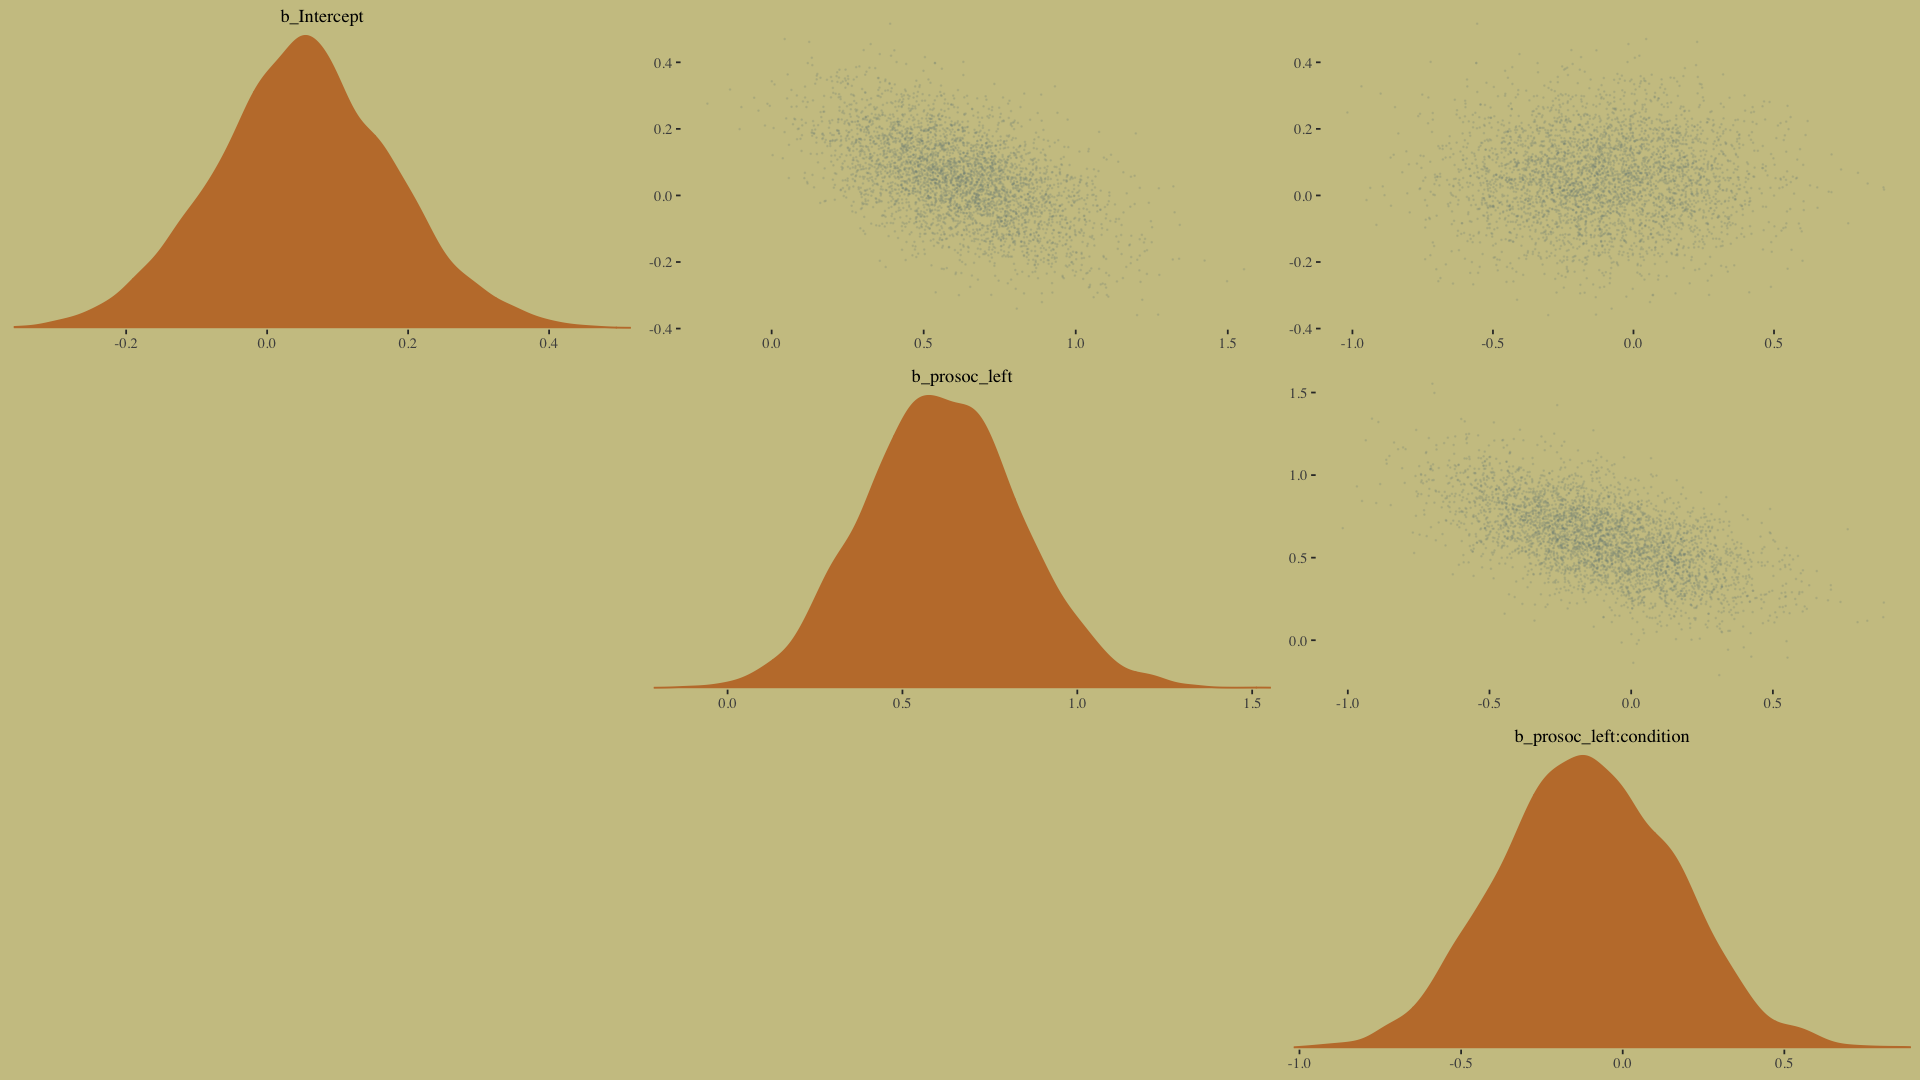

In [59]:
# this helps us set our custom color scheme
color_scheme_set(c(wes_palette("Moonrise2")[3], 
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[2], 
                   wes_palette("Moonrise2")[2], 
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[1]))

# the actual plot
mcmc_pairs(x = posterior_samples(b10.3),
           pars = c("b_Intercept", "b_prosoc_left", "b_prosoc_left:condition"),
           off_diag_args = list(size = 1/10, alpha = 1/6),
           diag_fun = "dens")

后验看起来是多元高斯分布

### 加入个体变异
\begin{aligned} \text { pulled }_{-} \text {left }_{i} & \sim \operatorname{Binomial}\left(1, p_{i}\right) \\ \operatorname{logit}\left(p_{i}\right) &=\alpha_{\text {actor }}+\left(\beta_{1}+\beta_{2} \text { condition }_{i}\right) \text { prosoc_left }_{i} \\ \alpha_{\text {actor }} & \sim \operatorname{Normal}(0,10) \\ \beta_{1} & \sim \operatorname{Normal}(0,10) \\ \beta_{2} & \sim \operatorname{Normal}(0,10) \end{aligned}
将`actor`变量包含在`factor()`中将产生我们需要获取的`actor`特定截距。还要注意，模型`formula`中使用`0 + factor(actor)`部分来抑制`brms`默认截距。这样，模型中所有参数的先验将为`class = b`。而且由于我们对每个都使用相同的高斯先验，因此`prior`参数仅需要一行。

In [61]:
b10.4 <-
  brm(data = d, family = binomial,
      pulled_left | trials(1) ~ 0 + factor(actor) + prosoc_left + condition:prosoc_left ,
      prior(normal(0, 10), class = b),
      iter = 2500, warmup = 500, chains = 4, cores = 4,
      control = list(adapt_delta = 0.9),
      seed = 10)

Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling

Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.9 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [62]:
distinct(d, actor)

actor
1 1    
2 2    
3 3    
4 4    
5 5    
6 6    
7 7

In [63]:
print(b10.4)

Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.9 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: binomial 
  Links: mu = logit 
Formula: pulled_left | trials(1) ~ 0 + factor(actor) + prosoc_left + condition:prosoc_left 
   Data: d (Number of observations: 504) 
Samples: 4 chains, each with iter = 2500; warmup = 500; thin = 1;
         total post-warmup samples = 8000

Population-Level Effects: 
                      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
factoractor1             -0.74      0.27    -1.30    -0.23 1.00     6228
factoractor2             10.75      5.17     4.02    22.98 1.00     5068
factoractor3             -1.06      0.28    -1.62    -0.52 1.00     6441
factoractor4             -1.06      0.28    -1.64    -0.51 1.00     6898
factoractor5             -0.74      0.27    -1.30    -0.23 1.00     5777
factoractor6              0.22      0.27    -0.29     0.75 1.00     5603
factoractor7              1.80      0.39     1.08     2.61 1.00     7574
prosoc_left               0.85      0.27     0.33     1.38 1.00     4004
prosoc_left:condition    -0.14   

相应地，`brms::posterior_samples()`返回一个b10.4中与`rethinking::extract.samples()`结构不完全相同的对象。我们只有一个典型的二维dataframe

In [72]:
post <- posterior_samples(b10.4)

glimpse(post)

Observations: 8,000
Variables: 10
$ b_factoractor1            <dbl> -1.0221980, -0.4520387, -0.5641025, -0.495…
$ b_factoractor2            <dbl> 11.077767, 12.754637, 7.731595, 9.061764, …
$ b_factoractor3            <dbl> -0.7751118, -0.6738382, -1.0685636, -0.818…
$ b_factoractor4            <dbl> -1.0357283, -1.0891426, -0.6388104, -0.718…
$ b_factoractor5            <dbl> -0.9186005, -0.5373394, -0.5783008, -0.617…
$ b_factoractor6            <dbl> -0.024190686, 0.012183469, 0.581377013, 0.…
$ b_factoractor7            <dbl> 2.173843, 2.227441, 1.807228, 1.754603, 1.…
$ b_prosoc_left             <dbl> 0.5513758, 0.4736976, 0.7081934, 0.4379992…
$ `b_prosoc_left:condition` <dbl> 0.17482624, 0.37414959, -0.15661196, -0.12…
$ lp__                      <dbl> -289.9450, -290.4555, -287.8889, -288.0465…


`actor2`的边缘后验密度

In [76]:
exp(b_factoractor2)   #prosoc_left

ERROR: Error in eval(expr, envir, enclos): 找不到对象'b_factoractor2'


In [17]:
inv_logit_scaled(4)

[1] 0.9820138

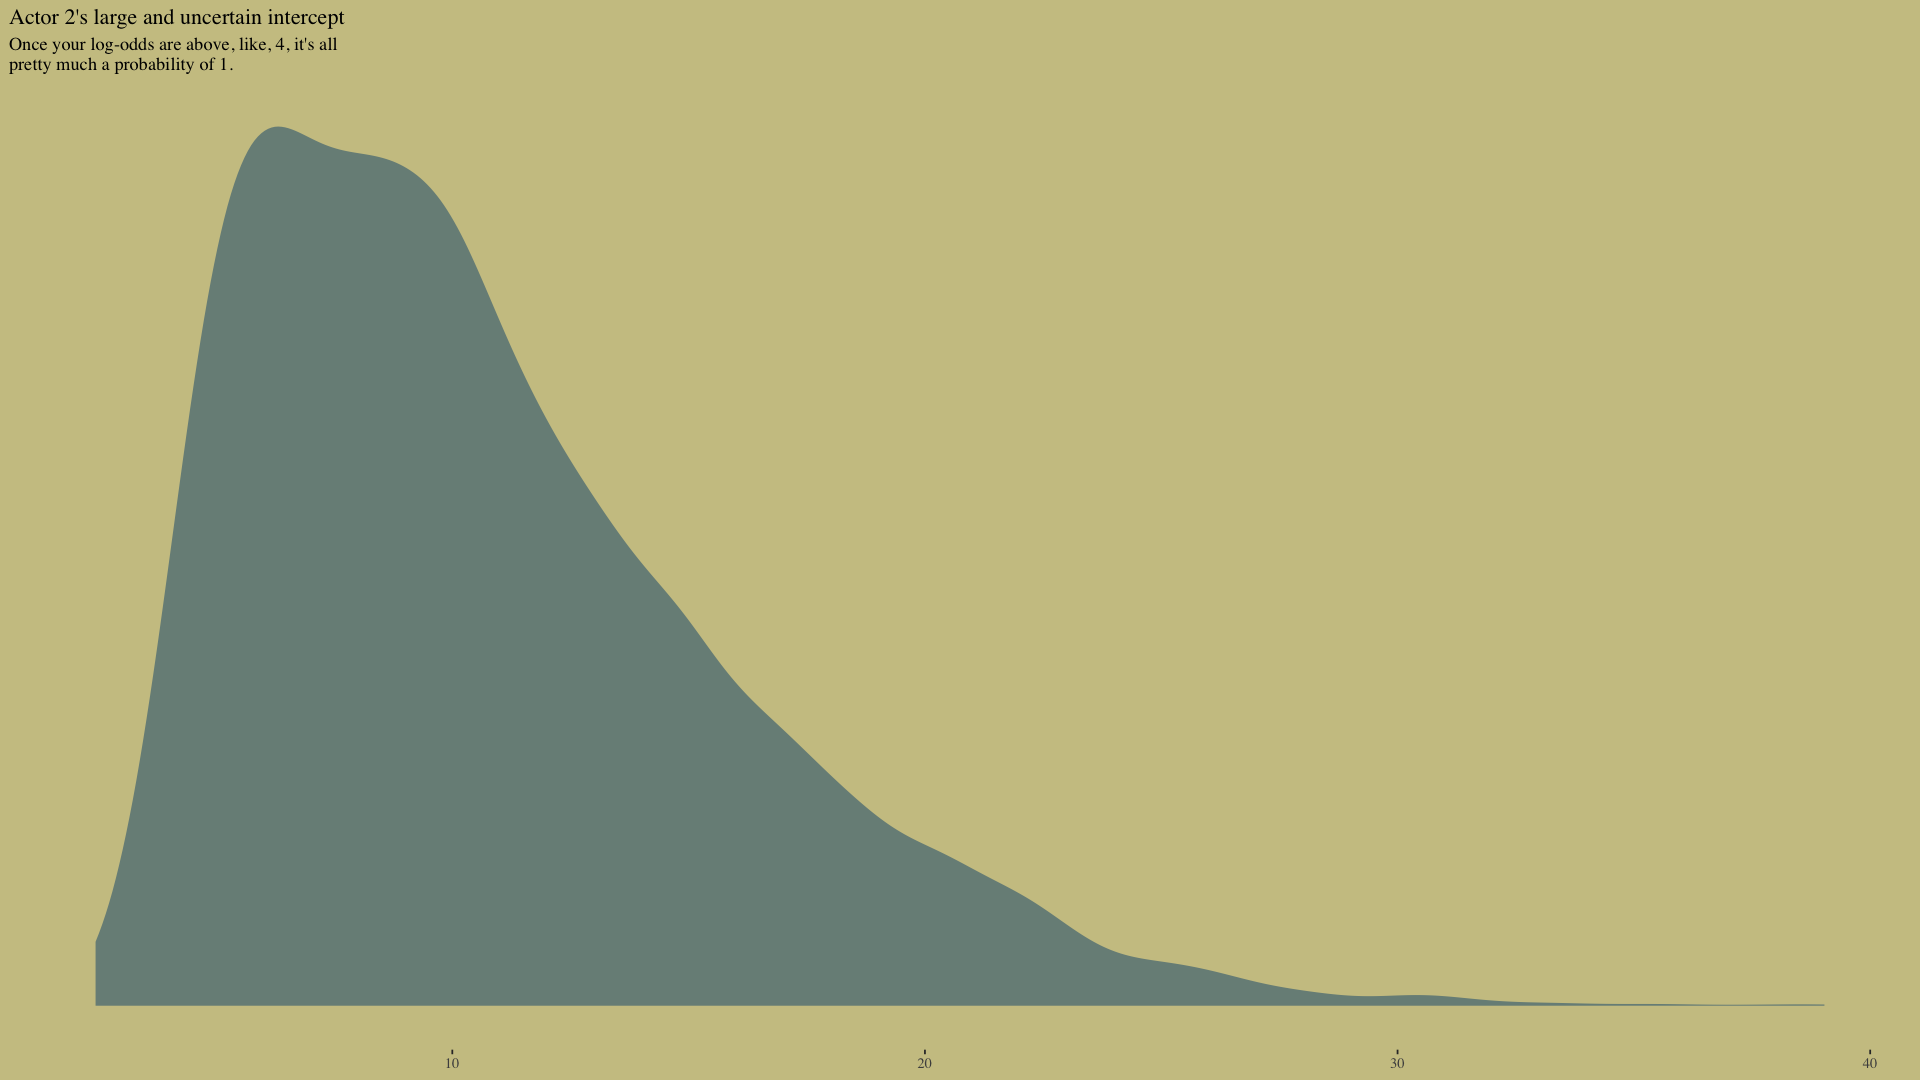

In [65]:
post %>%
  ggplot(aes(x = b_factoractor2)) +
  geom_density(color = "transparent",
               fill = wes_palette("Moonrise2")[1]) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(x        = NULL,
       title    = "Actor 2's large and uncertain intercept",
       subtitle = "Once your log-odds are above, like, 4, it's all\npretty much a probability of 1.")

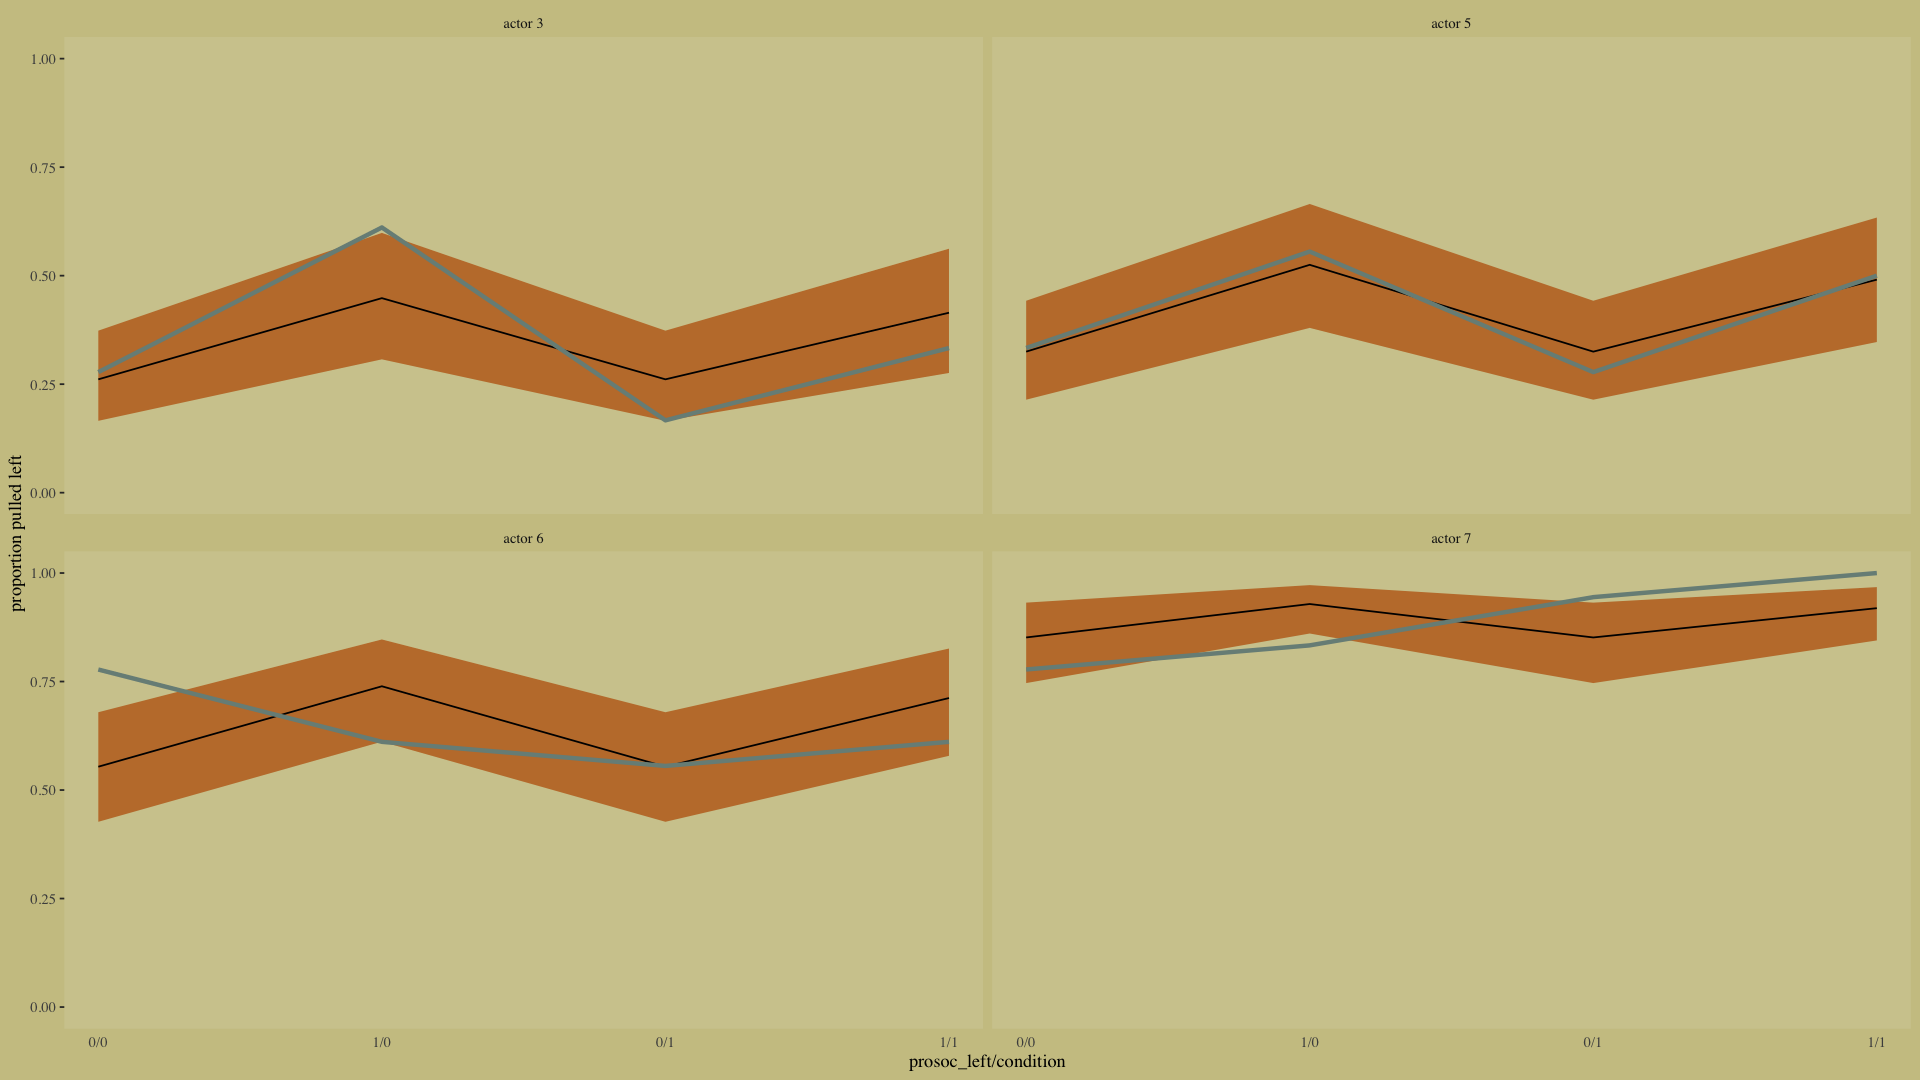

In [66]:
d_plot <-
  d %>%
  group_by(actor, condition, prosoc_left) %>%
  summarise(pulled_left = mean(pulled_left)) %>%
  mutate(x_axis = str_c(prosoc_left, condition, sep = "/")) %>%
  mutate(x_axis = factor(x_axis, levels = c("0/0", "1/0", "0/1", "1/1")))

# subset the `d_plot` data
d_plot_4 <-
  d_plot %>%
  filter(actor %in% c(3, 5:7)) %>%
  ungroup() %>% 
  mutate(actor = str_c("actor ", actor))

# compute the model-implied estimates with `fitted()` and wrangle
f <-
  fitted(b10.4) %>% 
  as_tibble() %>% 
  bind_cols(b10.4$data) %>% 
  filter(actor %in% c(3, 5:7)) %>% 
  distinct(Estimate, Q2.5, Q97.5, condition, prosoc_left, actor) %>% 
  select(actor, everything()) %>% 
  mutate(actor  = str_c("actor ", actor),
         x_axis = str_c(prosoc_left, condition, sep = "/")) %>%
  mutate(x_axis = factor(x_axis, levels = c("0/0", "1/0", "0/1", "1/1"))) %>% 
  rename(pulled_left = Estimate)

# plot
f %>% 
  ggplot(aes(x = x_axis, y = pulled_left, group = actor)) +
  geom_smooth(aes(ymin = Q2.5, ymax = Q97.5),
              stat = "identity",
              fill = wes_palette("Moonrise2")[2], color = "black", 
              alpha = 1, size = 1/2) +
  geom_line(data = d_plot_4,
            color = wes_palette("Moonrise2")[1], size = 1.25) +
  scale_x_discrete(expand = c(.03, .03)) +
  coord_cartesian(ylim = 0:1) +
  labs(x = "prosoc_left/condition",
       y = "proportion pulled left") +
  theme(axis.ticks.x     = element_blank(),
        # color came from: http://www.color-hex.com/color/ccc591
        panel.background = element_rect(fill = "#d1ca9c",
                                        color = "transparent")) +
  facet_wrap(~actor)

### 使用`group_by()`
在`tidyverse`中，如果想对`prosoc_left`、`condition`和`chinp actor`的每一组合计算`pulled_left == 1`试次的比例，需要把上述三个变量加入`group_by()`，然后通过`summarise()`计算pulled_left的均值

In [21]:
d %>% 
  group_by(prosoc_left, condition, actor) %>% 
  summarise(`proportion pulled_left` = mean(pulled_left))

prosoc_left condition actor proportion pulled_left
1  0           0         1     0.3333333             
2  0           0         2     1.0000000             
3  0           0         3     0.2777778             
4  0           0         4     0.3333333             
5  0           0         5     0.3333333             
6  0           0         6     0.7777778             
7  0           0         7     0.7777778             
8  0           1         1     0.2777778             
9  0           1         2     1.0000000             
10 0           1         3     0.1666667             
11 0           1         4     0.1111111             
12 0           1         5     0.2777778             
13 0           1         6     0.5555556             
14 0           1         7     0.9444444             
15 1           0         1     0.5000000             
16 1           0         2     1.0000000             
17 1           0         3     0.6111111             
18 1           0         4     0.5000000             
19 1           0         5     0.5555556             
20 1           0         6     0.6111111             
21 1           0         7     0.8333333             
22 1           1         1     0.5555556             
23 1           1         2     1.0000000             
24 1           1         3     0.3333333             
25 1           1         4     0.4444444             
26 1           1         5     0.5000000             
27 1           1         6     0.6111111             
28 1           1         7     1.0000000

## 累加二项：同样的数据，用累加后的结果

In [79]:
d_aggregated <-
  d %>%
  select(-recipient, -block, -trial, -chose_prosoc) %>%
  group_by(actor, condition, prosoc_left) %>%
  summarise(x = sum(pulled_left))

d_aggregated %>%
  filter(actor %in% c(1, 2))

actor condition prosoc_left x 
1 1     0         0            6
2 1     0         1            9
3 1     1         0            5
4 1     1         1           10
5 2     0         0           18
6 2     0         1           18
7 2     1         0           18
8 2     1         1           18

使用`brms`拟合累加二项模型，需要通过 `<criterion> | trials()`语法，其中`trials()`输入值要么是调整后的数（本例中），或者是数据索引n中的变量。无论哪种方式，需要保证n > 1

In [80]:
b10.5 <-
  brm(data = d_aggregated, family = binomial,
      x | trials(18) ~ 1 + prosoc_left + condition:prosoc_left,
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b)),
      iter = 5000, warmup = 1000, cores = 4, chains = 4, 
      seed = 10)

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



In [82]:
fixef(b10.3) %>% round(digits = 2)

Estimate Est.Error Q2.5  Q97.5
Intercept              0.05    0.13      -0.19 0.30 
prosoc_left            0.62    0.23       0.16 1.06 
prosoc_left:condition -0.11    0.27      -0.62 0.42

In [83]:
fixef(b10.5) %>% round(digits = 2)

Estimate Est.Error Q2.5  Q97.5
Intercept              0.05    0.13      -0.20 0.30 
prosoc_left            0.61    0.23       0.17 1.05 
prosoc_left:condition -0.11    0.27      -0.63 0.41

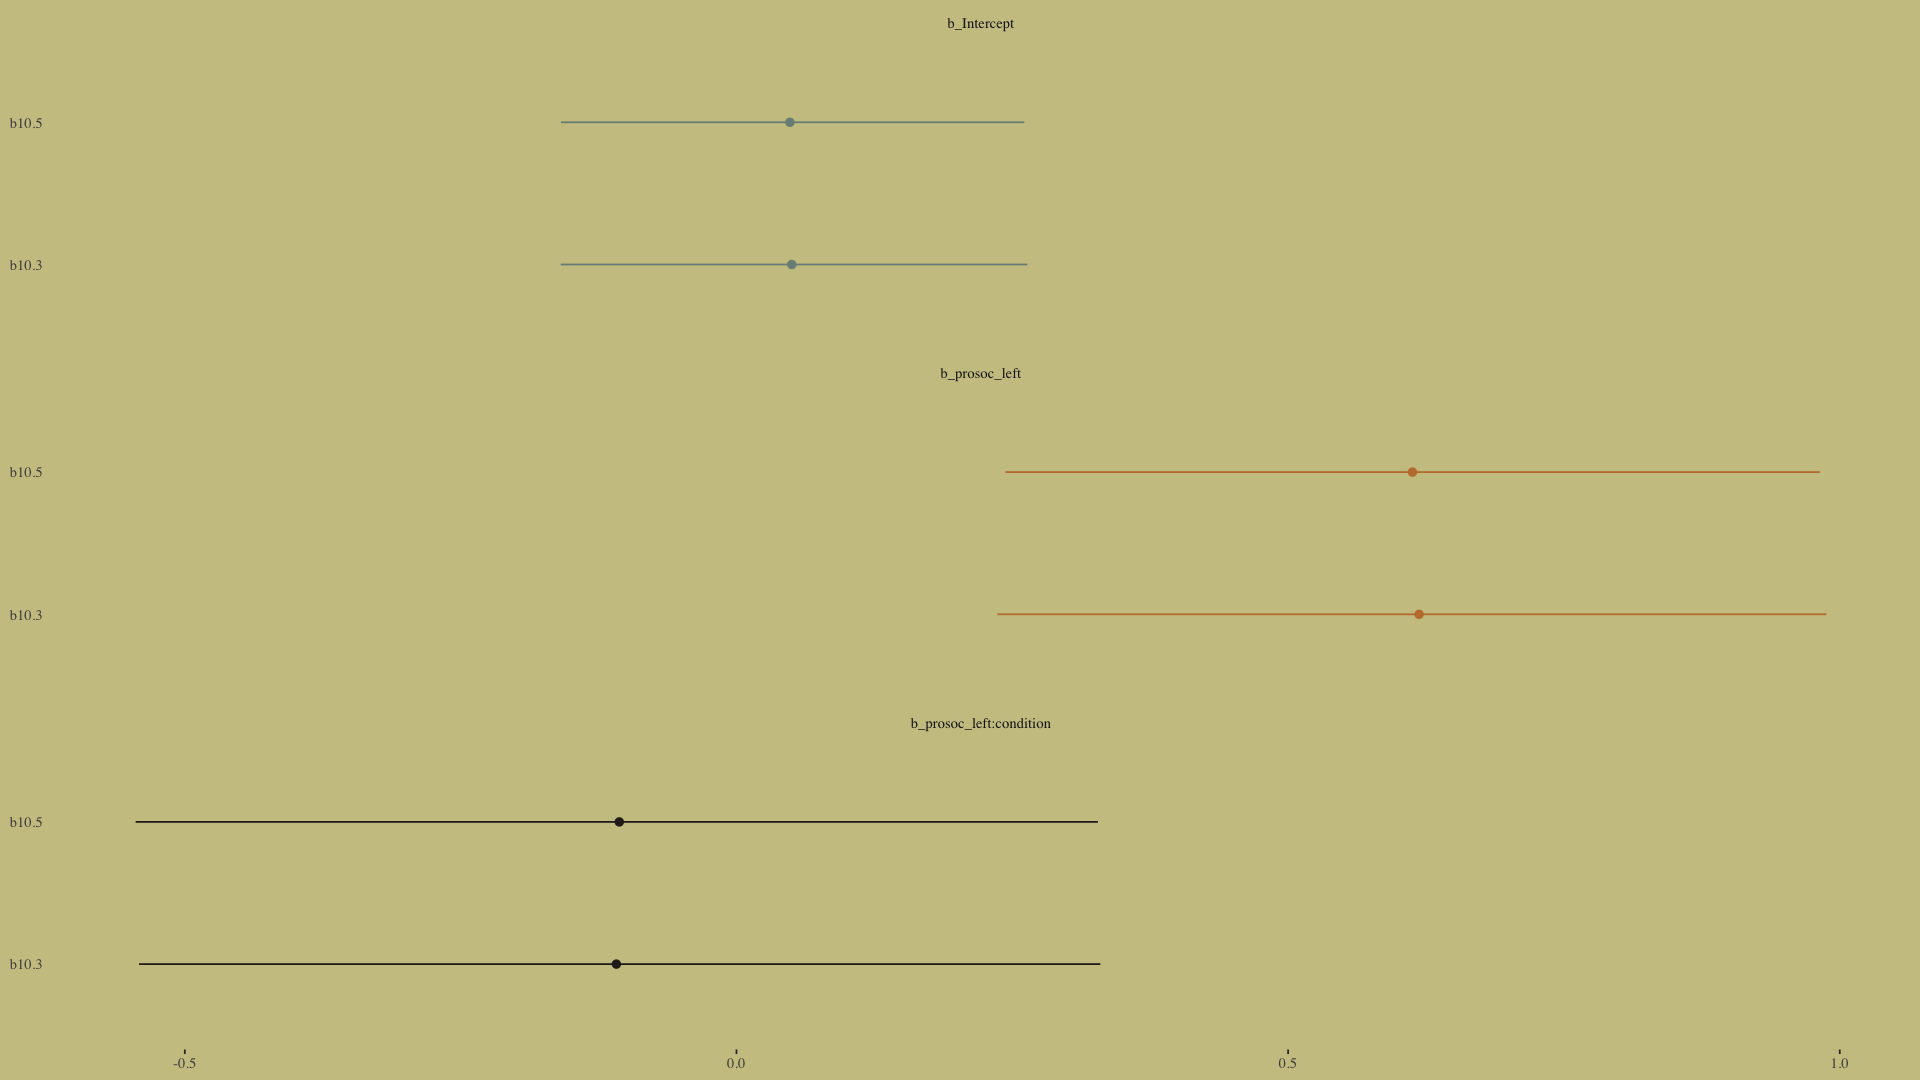

In [84]:
library(broom)

# wrangle
tibble(model  = str_c("b10.", c(3, 5))) %>% 
  mutate(fit  = map(model, get)) %>% 
  mutate(tidy = map(fit, tidy)) %>% 
  unnest(tidy) %>% 
  filter(term != "lp__") %>% 
  
  # plot
  ggplot() +
  geom_pointrange(aes(x = model, y = estimate,
                      ymin = lower,
                      ymax = upper,
                      color = term),
                  shape = 16) +
  scale_color_manual(values = wes_palette("Moonrise2")[c(1:2, 4)]) +
  coord_flip() +
  labs(x = NULL, y = NULL) +
  theme(axis.ticks.y    = element_blank(),
        legend.position = "none") +
  facet_wrap(~term, ncol = 1)

## 累加二项：研究生院录取

In [86]:
# detach(package:brms)
library(rethinking)
data(UCBadmit)
d <- UCBadmit
detach(package:rethinking, unload = T)
library(brms)
rm(UCBadmit)

d

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:purrr’:

    map


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:stats’:

    rstudent




dept applicant.gender admit reject applications
1  A    male             512   313    825         
2  A    female            89    19    108         
3  B    male             353   207    560         
4  B    female            17     8     25         
5  C    male             120   205    325         
6  C    female           202   391    593         
7  D    male             138   279    417         
8  D    female           131   244    375         
9  E    male              53   138    191         
10 E    female            94   299    393         
11 F    male              22   351    373         
12 F    female            24   317    341

加州大学伯克利分校 6 个不同的学院收到的入学申请数据，来自 4526 个申请者

In [87]:
d <- 
  d %>%
  mutate(male = ifelse(applicant.gender == "male", 1, 0))
d

dept applicant.gender admit reject applications male
1  A    male             512   313    825          1   
2  A    female            89    19    108          0   
3  B    male             353   207    560          1   
4  B    female            17     8     25          0   
5  C    male             120   205    325          1   
6  C    female           202   391    593          0   
7  D    male             138   279    417          1   
8  D    female           131   244    375          0   
9  E    male              53   138    191          1   
10 E    female            94   299    393          0   
11 F    male              22   351    373          1   
12 F    female            24   317    341          0

二项回归模型，将`admit`视为申请者性别的函数。通过这种方式估计性别和录取概率之间的联系
\begin{aligned} n_{\text {admiti }} & \sim \text { Binomial }\left(n_{i}, p_{i}\right) \\ \operatorname{logit}\left(p_{i}\right) &=\alpha+\beta \text { male }_{i} \\ \alpha & \sim \operatorname{Normal}(0,10) \\ \beta & \sim \operatorname{Normal}(0,10) \end{aligned}

In [119]:
# 二项回归模型，将admit视为申请者性别的函数。通过这种方式估计性别和录取概率之间的联系

b10.6 <-
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1 + male ,
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b)),
      iter = 5000, warmup = 1000, cores = 4, chains = 4,
      seed = 10) 

# 二项回归模型，将 `admit` 视为常数，忽视性别。这会帮助我们了解前一回归中的模型是否过度拟合

b10.7 <-
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1,
      prior(normal(0, 10), class = Intercept),
      iter = 5000, warmup = 1000, cores = 4, chains = 4,
      seed = 10)

b10.6 <- add_criterion(b10.6, "waic")
b10.7 <- add_criterion(b10.7, "waic")

w <- loo_compare(b10.6, b10.7, criterion = "waic")

print(w, simplify = F)

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling



      elpd_diff se_diff elpd_waic se_elpd_waic p_waic se_p_waic waic   se_waic
b10.6    0.0       0.0  -494.7     164.0        111.3   40.0     989.3  327.9 
b10.7  -28.2      83.7  -522.9     163.7         83.6   36.5    1045.7  327.4 


In [89]:
cbind(waic_diff = w[, 1] * -2,
      se        = w[, 2] *  2) %>% 
  round(digits = 2)

waic_diff se   
b10.6  0.00       0.0
b10.7 56.42     167.3

### 题外话：使用`loo`进行模型比较

In [90]:
b10.6 <- add_criterion(b10.6, "loo")
b10.7 <- add_criterion(b10.7, "loo")

Warning message:
“Found 6 observations with a pareto_k > 0.7 in model 'b10.6'. It is recommended to set 'reloo = TRUE' in order to calculate the ELPD without the assumption that these observations are negligible. This will refit the model 6 times to compute the ELPDs for the problematic observations directly.”
Warning message:
“Found 4 observations with a pareto_k > 0.7 in model 'b10.7'. It is recommended to set 'reloo = TRUE' in order to calculate the ELPD without the assumption that these observations are negligible. This will refit the model 4 times to compute the ELPDs for the problematic observations directly.”


警告要求我们估计帕累托k参数，这可以通过`loo`包中的`PSIS-LOO`函数来操作。`Pareto k`可作为一个诊断工具，数据中的每一个案例有自身k值，我们希望k值越低越好。当k>0.7时，软件就会告警。我们将使用`pareto_k_table()`和`pareto_k_ids()`函数来调节这些k值，二者都接受`loo()`或`psis()`函数创建的对象

In [91]:
library(loo)
l_b10.6 <- loo(b10.6)
l_b10.7 <- loo(b10.7)

This is loo version 2.2.0

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 


Attaching package: ‘loo’


The following object is masked from ‘package:rstan’:

    loo


Warning message:
“Found 6 observations with a pareto_k > 0.7 in model 'b10.6'. It is recommended to set 'reloo = TRUE' in order to calculate the ELPD without the assumption that these observations are negligible. This will refit the model 6 times to compute the ELPDs for the problematic observations directly.”
Warning message:
“Found 4 observations with a pareto_k > 0.7 in model 'b10.7'. It is recommended to set 'reloo = TRUE' in order to calculate the ELPD without the assumption that these observations are negligible. This will refit the model 4 times to compute the ELPDs for the problematic observations directly.”


使用`pareto_k_table()`，我们可以看到`Pareto-k`值是如何被分类到范围从“好”到“非常坏”的范围，而此案例中较差(高)的k值有4个`[1, Inf]`

In [92]:
pareto_k_table(l_b10.6) 

Count Proportion Min. n_eff 
(-Inf, 0.5] 4     0.3333333  1561.063260
(0.5, 0.7]  2     0.1666667   631.394161
(0.7, 1]    2     0.1666667    48.010377
(1, Inf)    4     0.3333333     2.836667

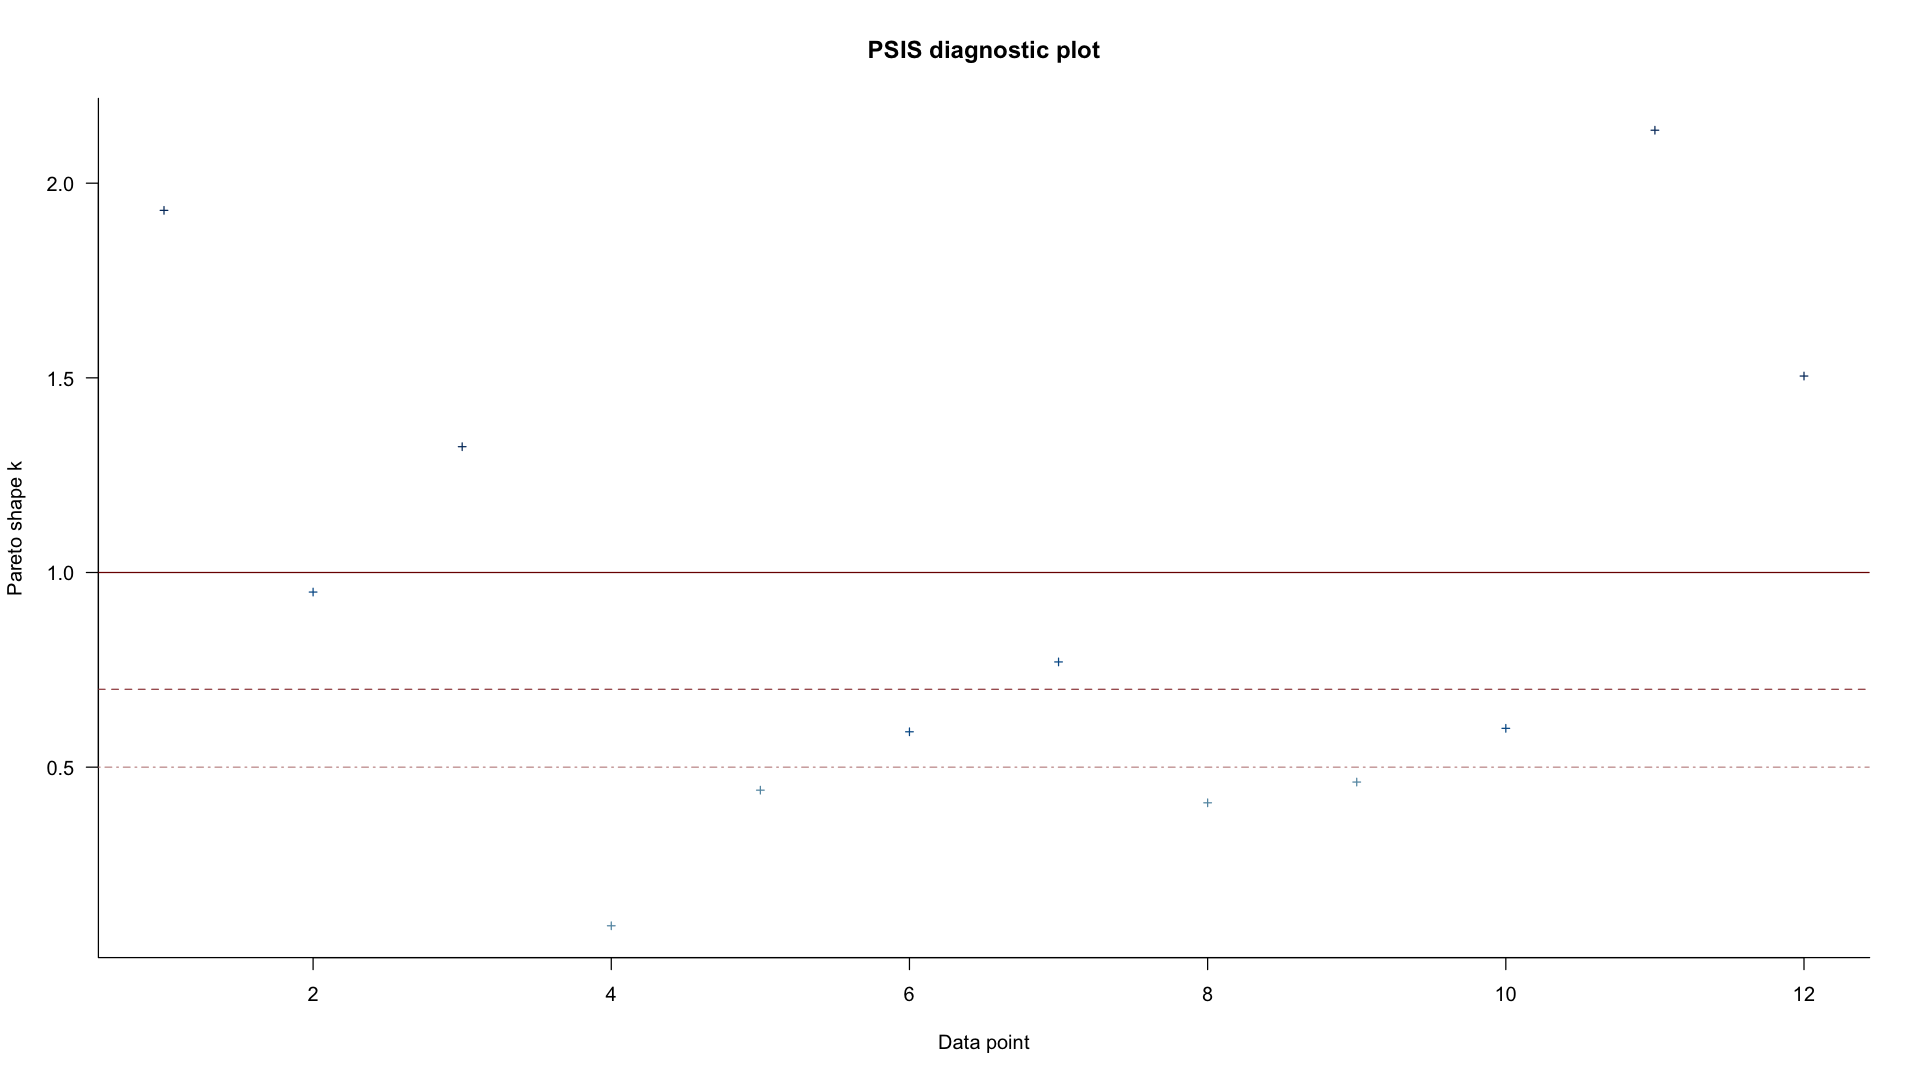

In [93]:
plot(l_b10.6)

In [98]:
pareto_k_ids(l_b10.6, threshold = 1)

[1]  1  3 11 12

In [99]:
l_b10.6$diagnostics

$pareto_k
 [1] 1.93017509 0.94976847 1.32316153 0.09258398 0.44089925 0.59086536
 [7] 0.77028945 0.40844847 0.46174689 0.59971984 2.13603940 1.50462221

$n_eff
 [1]    7.011143   48.010377   15.698106 7344.058799 3062.034134  631.394161
 [7]  108.475271 2480.423989 1561.063260  643.863151    2.836667   12.155014

`pareto_k` 可用于检查对模型参数影响过大的案例，比如$\text { Cook's } D_{i}$。无论如何，上面的结果显示b10.6并非对数据的最佳拟合。  
可遵循报警信息中的通过设置`reloo = TRUE'`计算`ELPD` 而无需假设观测值是可忽略的。这将对模型进行6次重拟合，以直接计算有问题观测值的ELPDs

In [108]:
l_b10.6_reloo <- loo(b10.6, reloo = T)
l_b10.7_reloo <- loo(b10.7, reloo = T)
l_b10.6_reloo
cat("=======================================================\n")
l_b10.7_reloo
cat("=======================================================\n")
loo_compare(l_b10.6_reloo, l_b10.7_reloo)

6 problematic observation(s) found.
The model will be refit 6 times.


Fitting model 1 out of 6 (leaving out observation 1)


Fitting model 2 out of 6 (leaving out observation 2)


Fitting model 3 out of 6 (leaving out observation 3)


Fitting model 4 out of 6 (leaving out observation 7)


Fitting model 5 out of 6 (leaving out observation 11)


Fitting model 6 out of 6 (leaving out observation 12)

Start sampling

Start sampling

Start sampling

Start sampling

Start sampling

Start sampling

4 problematic observation(s) found.
The model will be refit 4 times.


Fitting model 1 out of 4 (leaving out observation 1)


Fitting model 2 out of 4 (leaving out observation 3)


Fitting model 3 out of 4 (leaving out observation 11)


Fitting model 4 out of 4 (leaving out observation 12)

Start sampling

Start sampling

Start sampling

Start sampling




Computed from 16000 by 12 log-likelihood matrix

         Estimate    SE
elpd_loo   -512.7 169.6
p_loo       129.3  49.0
looic      1025.4 339.2
------
Monte Carlo SE of elpd_loo is 1.1.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     10    83.3%   3         
 (0.5, 0.7]   (ok)        2    16.7%   631       
   (0.7, 1]   (bad)       0     0.0%   <NA>      
   (1, Inf)   (very bad)  0     0.0%   <NA>      

All Pareto k estimates are ok (k < 0.7).
See help('pareto-k-diagnostic') for details.


Computed from 16000 by 12 log-likelihood matrix

         Estimate    SE
elpd_loo   -527.3 166.3
p_loo        88.0  40.5
looic      1054.6 332.5
------
Monte Carlo SE of elpd_loo is 1.2.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     11    91.7%   2         
 (0.5, 0.7]   (ok)        1     8.3%   236       
   (0.7, 1]   (bad)       0     0.0%   <NA>      
   (1, Inf)   (very bad)  0     0.0%   <NA>      

All Pareto k estimates are ok (k < 0.7).
See help('pareto-k-diagnostic') for details.

elpd_diff se_diff elpd_loo  se_elpd_loo p_loo     se_p_loo looic   
b10.6   0.00000  0.0000 -512.6988 169.5757    129.32699 49.02996 1025.398
b10.7 -14.61374 81.6613 -527.3125 166.2512     88.00978 40.50153 1054.625
      se_looic
b10.6 339.1514
b10.7 332.5025

在这种情况下，结果是相似的。与点估计相比，这些差异的标准误非常大，表明存在很大的不确定性。在您的真实数据中要注意这一点

### 比较模型

In [103]:
print(b10.6)

 Family: binomial 
  Links: mu = logit 
Formula: admit | trials(applications) ~ 1 + male 
   Data: d (Number of observations: 12) 
Samples: 4 chains, each with iter = 5000; warmup = 1000; thin = 1;
         total post-warmup samples = 16000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.83      0.05    -0.93    -0.73 1.00     9476     9662
male          0.61      0.06     0.49     0.74 1.00    10828     9909

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [104]:
# 录取率的几率差异

fixef(b10.6)[2] %>%
  exp() %>%
  round(digits = 2)

[1] 1.84

从结果上看，男性确实具有优势，可以计算出相对录取几率比的倍数变化 exp (0.61) ≈ 1.84。这意味着男性申请者被录取的几率比是女性申请者的 184%

In [105]:
post <- posterior_samples(b10.6)

post %>%
  mutate(p_admit_male   = inv_logit_scaled(b_Intercept + b_male),
         p_admit_female = inv_logit_scaled(b_Intercept),
         diff_admit     = p_admit_male - p_admit_female) %>%
  summarise(`2.5%`  = quantile(diff_admit, probs = .025),
            `50%`   = median(diff_admit),
            `97.5%` = quantile(diff_admit, probs = .975))

2.5%      50%       97.5%    
1 0.1136635 0.1416954 0.1697298

男性优势的中位数估计大约是14%,95%的置信区间从11%到将近17%

In [115]:
d <-
  d %>%
  mutate(case = factor(1:12))

p <- 
  predict(b10.6) %>% 
  as_tibble() %>% 
  bind_cols(d)

d_text <-
  d %>%
  group_by(dept) %>%
  summarise(case  = mean(as.numeric(case)),
            admit = mean(admit / applications) + .05)

ggplot(data = d, aes(x = case, y = admit / applications)) +
  geom_pointrange(data = p, 
                  aes(y    = Estimate / applications,
                      ymin = Q2.5     / applications ,
                      ymax = Q97.5    / applications),
                  color = wes_palette("Moonrise2")[1],
                  shape = 1, alpha = 1/2) +
  geom_point(color = wes_palette("Moonrise2")[2]) +
  geom_line(aes(group = dept),
            color = wes_palette("Moonrise2")[2]) +
  geom_text(data = d_text,
            aes(y = admit, label = dept),
            color = wes_palette("Moonrise2")[2],
            family = "serif") +
  coord_cartesian(ylim = 0:1) +
  labs(y     = "Proportion admitted",
       title = "Posterior validation check") +
  theme(axis.ticks.x = element_blank())

ERROR: Error in predict(b10.6): 找不到对象'b10.6'


### 估计男/女录取率的学院平均差别
正如上面提到的LOO/`pareto_k`，这不是一个很好的搭配。这里我们不再问“对不同院系，女性和男性的录取率有什么差别？”，而是转而问对于特定院系，男性和女性录取率的平均差别是多少？”为了解答第二个问题，我们需要对每个院系估计女性的录取率一截距，然后估计男性录取率和女性录取率的平均差别
\begin{aligned} n_{\text {admiti }} & \sim \text { Binomial }\left(n_{i}, p_{i}\right) \\ \operatorname{logit}\left(p_{i}\right) &=\alpha_{\text {dept }}+\beta \text { male }_{i} \\ \alpha_{\text {dept }} & \sim \operatorname{Normal}(0,10) \\ \beta & \sim \operatorname{Normal}(0,10) \end{aligned}

In [116]:
# 对每个院系拟合单独的截距
b10.8 <-
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 0 + dept,
      prior(normal(0, 10), class = b),
      iter = 5000, warmup = 1000, cores = 4, chains = 4,
      seed = 10) 

# 加上性别变量再次拟合模型
b10.9 <-
  update(b10.8,
         newdata = d,
         formula = admit | trials(applications) ~ 0 + dept + male)

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling

Start sampling




SAMPLING FOR MODEL '84ca3eaf4031602c7ef89b411c155ae6' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1001 / 5000 [ 20%]  (Sampling)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Sampling)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.0884 seconds (Warm-up)
Chain 1:                0.319714 seconds (Sampli

In [117]:
l_b10.8_reloo <- loo(b10.8, reloo = T)
l_b10.9_reloo <- loo(b10.9, reloo = T)
loo_compare(l_b10.6_reloo, l_b10.7_reloo, l_b10.8_reloo, l_b10.9_reloo)

4 problematic observation(s) found.
The model will be refit 4 times.


Fitting model 1 out of 4 (leaving out observation 1)


Fitting model 2 out of 4 (leaving out observation 3)


Fitting model 3 out of 4 (leaving out observation 6)


Fitting model 4 out of 4 (leaving out observation 10)

Start sampling

Start sampling

Start sampling

Start sampling

5 problematic observation(s) found.
The model will be refit 5 times.


Fitting model 1 out of 5 (leaving out observation 1)


Fitting model 2 out of 5 (leaving out observation 3)


Fitting model 3 out of 5 (leaving out observation 5)


Fitting model 4 out of 5 (leaving out observation 6)


Fitting model 5 out of 5 (leaving out observation 10)

Start sampling

Start sampling

Start sampling

Start sampling

Start sampling



elpd_diff   se_diff    elpd_loo   se_elpd_loo p_loo     se_p_loo 
b10.8    0.000000   0.000000  -61.58952  12.92675    15.55715  9.162708
b10.9   -4.258438   2.508136  -65.84796  12.43713    21.03659  9.325793
b10.6 -451.109236 166.225548 -512.69875 169.57568   129.32699 49.029962
b10.7 -465.722977 161.272150 -527.31250 166.25125    88.00978 40.501533
      looic     se_looic 
b10.8  123.1790  25.85350
b10.9  131.6959  24.87426
b10.6 1025.3975 339.15137
b10.7 1054.6250 332.50249

现在没有`male`变量的模型`b10.8`排名最靠前

In [120]:
model_weights(b10.6, b10.7, b10.8, b10.9,
              weights = "loo") %>% 
  round(digits = 3)

b10.6 b10.7 b10.8 b10.9 
0.000 0.000 0.966 0.034

查看多变量模型的参数

In [122]:
fixef(b10.8) %>% round(digits = 2)
fixef(b10.9) %>% round(digits = 2)

Estimate Est.Error Q2.5  Q97.5
deptA  0.59    0.07       0.46  0.73
deptB  0.54    0.09       0.38  0.71
deptC -0.62    0.07      -0.75 -0.48
deptD -0.67    0.07      -0.81 -0.52
deptE -1.09    0.10      -1.28 -0.91
deptF -2.69    0.15      -3.00 -2.40

Estimate Est.Error Q2.5  Q97.5
deptA  0.68    0.10       0.49  0.88
deptB  0.64    0.12       0.41  0.87
deptC -0.58    0.07      -0.73 -0.44
deptD -0.61    0.09      -0.78 -0.44
deptE -1.06    0.10      -1.25 -0.87
deptF -2.64    0.16      -2.95 -2.34
male  -0.10    0.08      -0.26  0.06

In [124]:
# b_male 后验均值的对数几率标度
exp(fixef(b10.9)[7, 1])

[1] 0.9046089

In [125]:
b10.9$fit

Inference for Stan model: 84ca3eaf4031602c7ef89b411c155ae6.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

          mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
b_deptA   0.68    0.00 0.10   0.49   0.62   0.68   0.75   0.88  8491    1
b_deptB   0.64    0.00 0.12   0.41   0.56   0.64   0.72   0.87  9054    1
b_deptC  -0.58    0.00 0.07  -0.73  -0.63  -0.58  -0.53  -0.44 14245    1
b_deptD  -0.61    0.00 0.09  -0.78  -0.67  -0.61  -0.55  -0.44 11862    1
b_deptE  -1.06    0.00 0.10  -1.25  -1.13  -1.06  -0.99  -0.87 14479    1
b_deptF  -2.64    0.00 0.16  -2.95  -2.74  -2.63  -2.53  -2.34 16000    1
b_male   -0.10    0.00 0.08  -0.26  -0.15  -0.10  -0.04   0.06  6730    1
lp__    -70.71    0.02 1.88 -75.23 -71.75 -70.38 -69.31 -68.03  6992    1

Samples were drawn using NUTS(diag_e) at Sun Mar 22 21:00:25 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the 

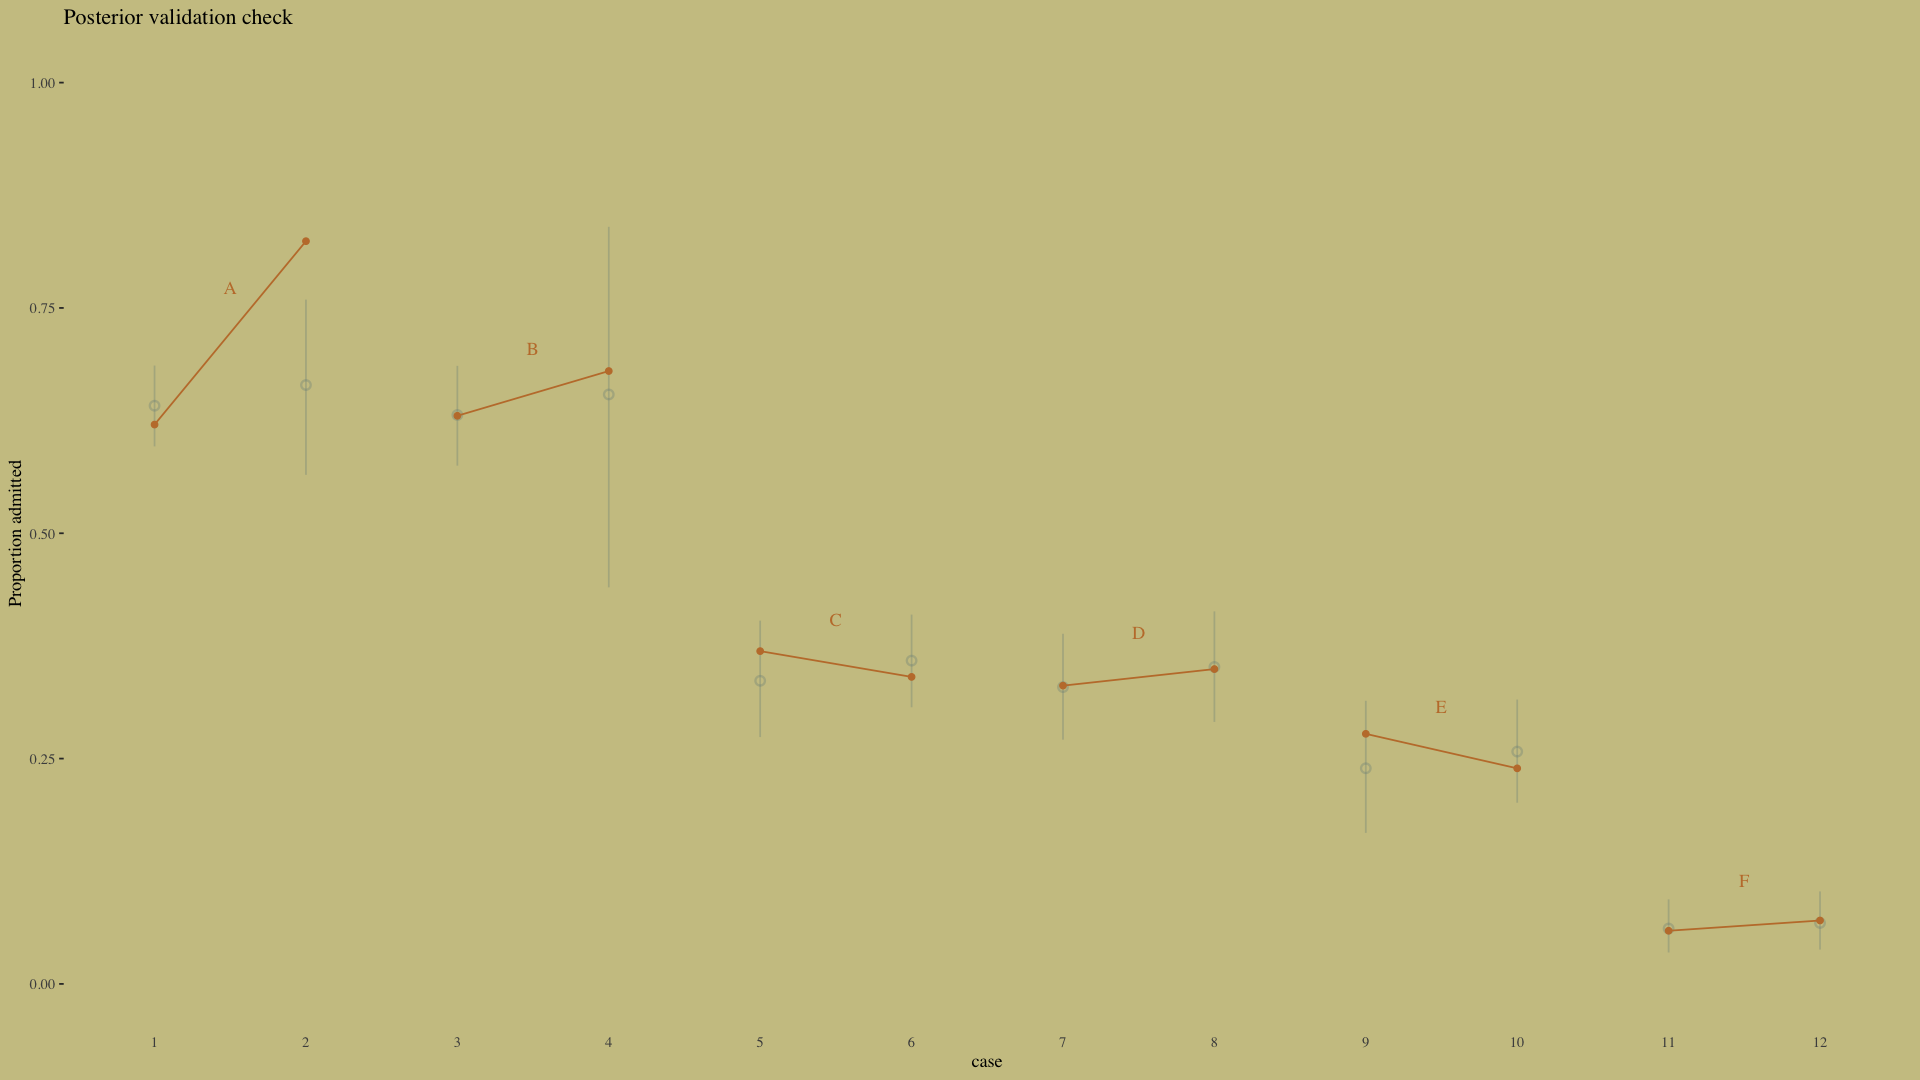

In [129]:
d_text <-
  d %>%
  group_by(dept) %>%
  summarise(case  = mean(as.numeric(case)),
            admit = mean(admit / applications) + .05)

predict(b10.9) %>%
  as_tibble() %>% 
  bind_cols(d) %>% 

  ggplot(aes(x = case, y = admit / applications)) +
  geom_pointrange(aes(y    = Estimate / applications,
                      ymin = Q2.5     / applications ,
                      ymax = Q97.5    / applications),
                  color = wes_palette("Moonrise2")[1],
                  shape = 1, alpha = 1/3) +
  geom_point(color = wes_palette("Moonrise2")[2]) +
  geom_line(aes(group = dept),
            color = wes_palette("Moonrise2")[2]) +
  geom_text(data = d_text,
            aes(y = admit, label = dept),
            color = wes_palette("Moonrise2")[2],
            family = "serif") +
  coord_cartesian(ylim = 0:1) +
  labs(y     = "Proportion admitted",
       title = "Posterior validation check") +
  theme(axis.ticks.x = element_blank())

后验看起来是多元高斯

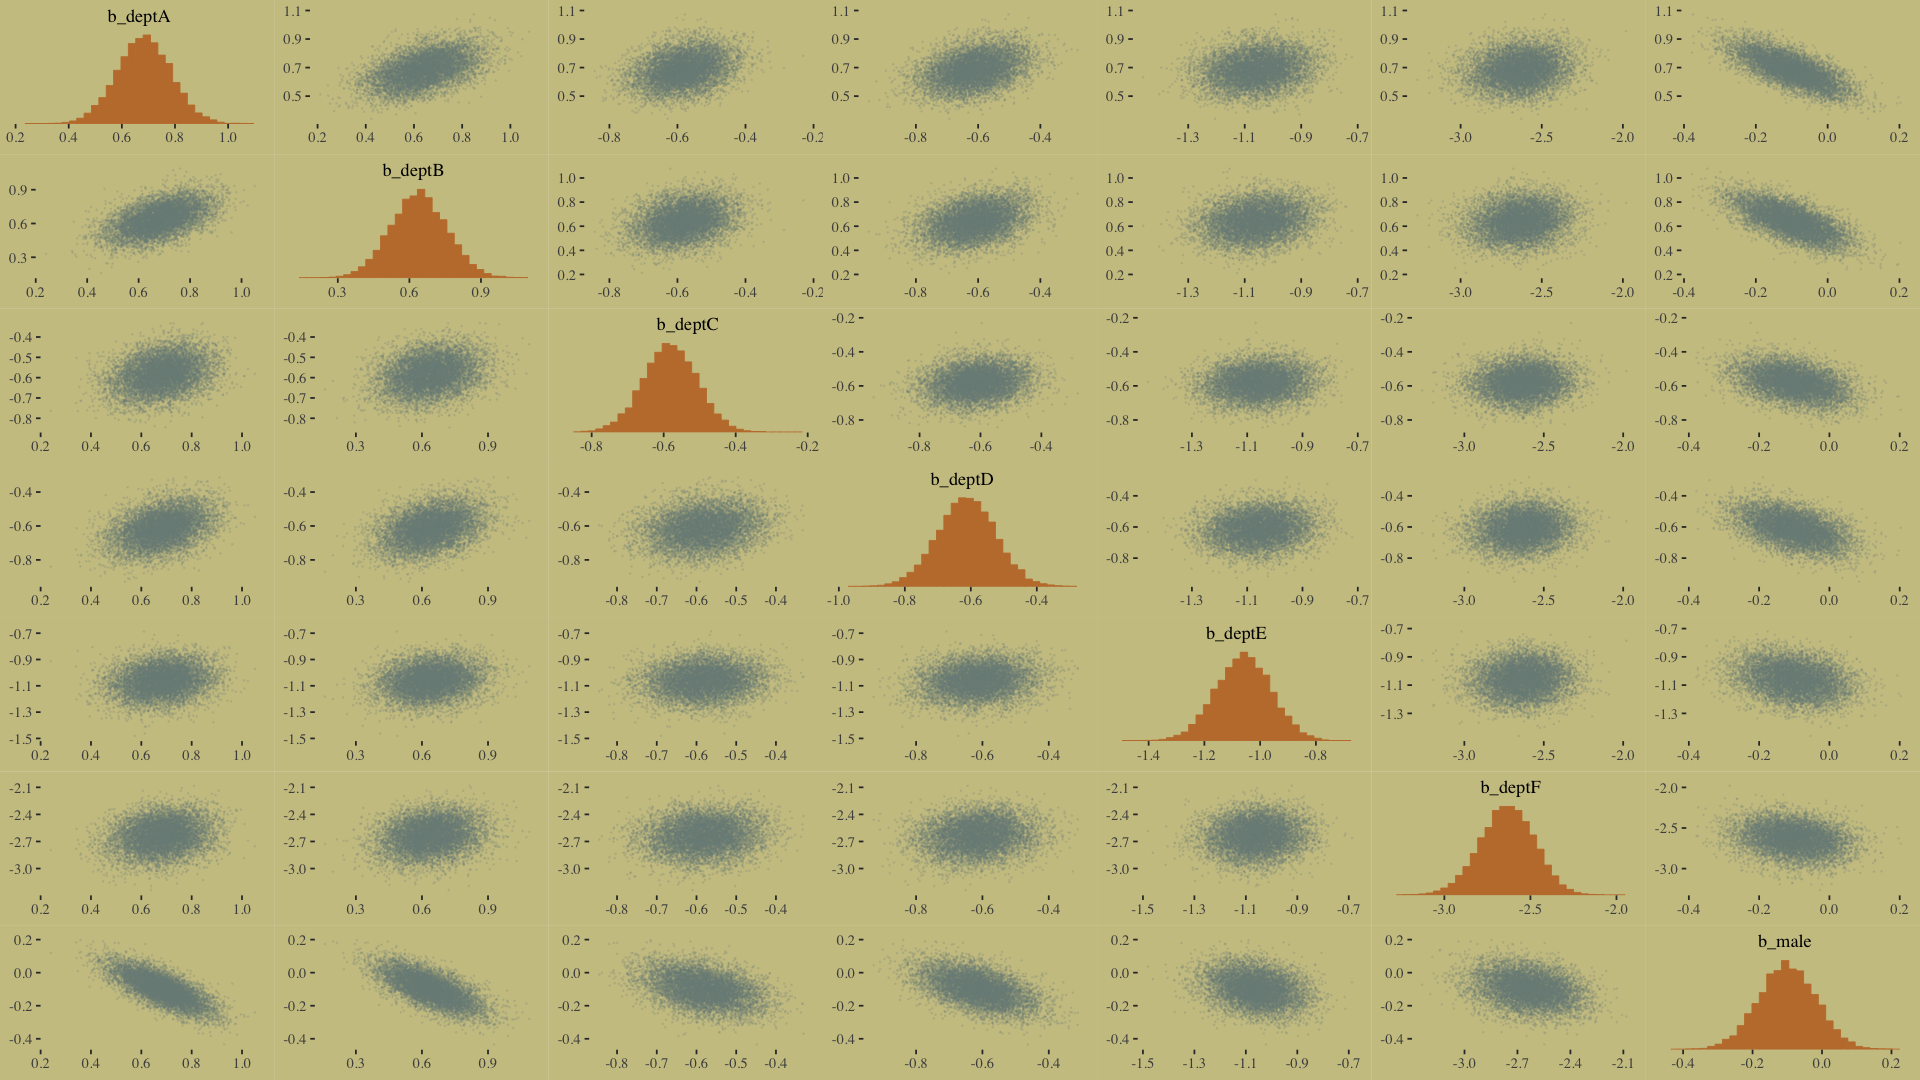

In [128]:
pairs(b10.9,
      off_diag_args = list(size = 1/10, alpha = 1/6))

## 用glm拟合二项回归模型

In [132]:
# outcome and predictor almost perfectly associated
y <- c(rep(0, 10), rep(1, 10))
x <- c(rep(-1, 9), rep(1, 11))
x
y

[1] -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1

[1] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1

In [133]:
b.good <-
  brm(data = list(y = y, x = x), family = binomial,
      y ~ 1 + x,
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 10), class = b)),
      seed = 10) 

print(b.good)

Using the maximum response value as the number of trials.

Warning message:
“Using 'binomial' families without specifying 'trials' on the left-hand side of the model formula is deprecated.”
Only 2 levels detected so that family 'bernoulli' might be a more efficient choice.

Compiling the C++ model

recompiling to avoid crashing R session

Start sampling




SAMPLING FOR MODEL 'd5bacc577b453cc490f4aef086ca64cc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.103204 seconds (Warm-up)
Chain 1:                0.101244 seconds (Sampling)


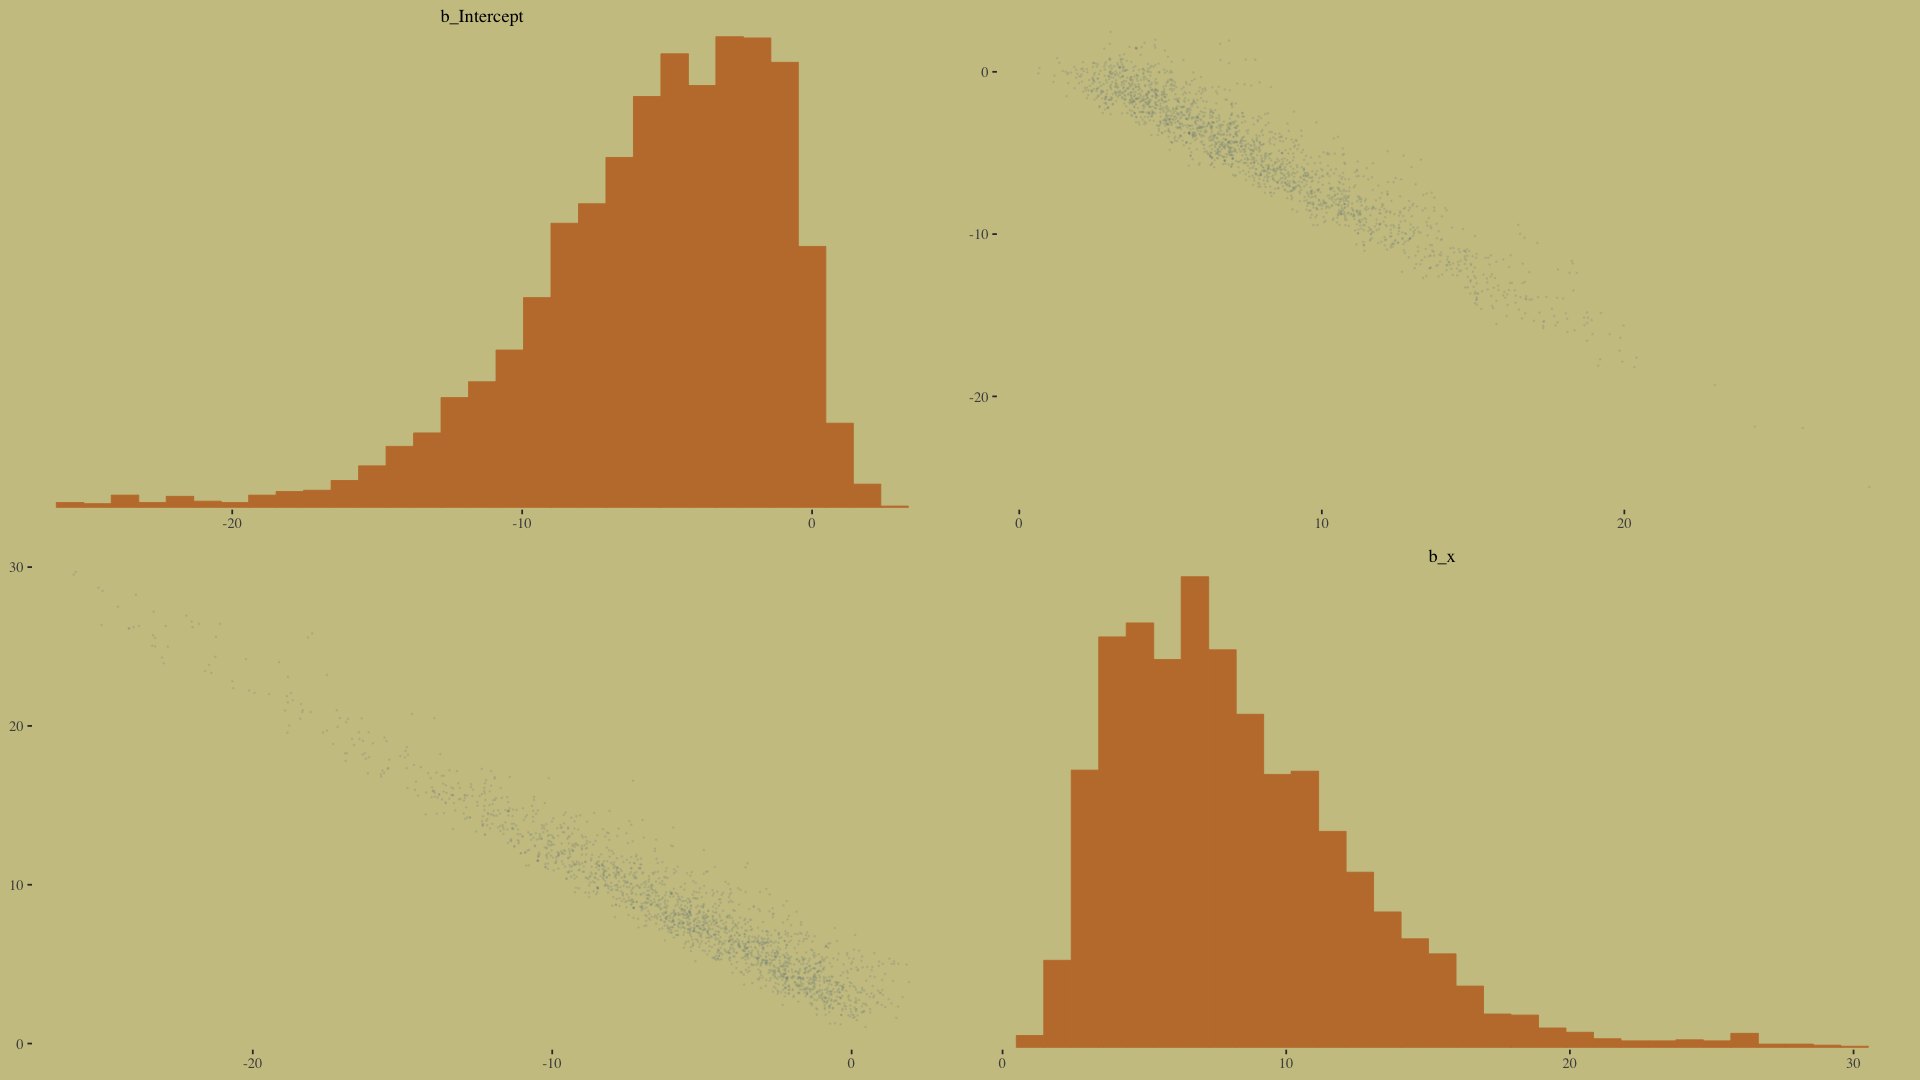

In [134]:
pairs(b.good,
      off_diag_args = list(size = 1/10, alpha = 1/6))

# 泊松回归

In [136]:
set.seed(10) # make the results reproducible

tibble(y = rbinom(1e5, 1000, 1/1000)) %>% 
  summarise(y_mean     = mean(y),
            y_variance = var(y))

y_mean  y_variance
1 0.99426 0.995197

## 海洋工具复杂度

In [138]:
library(rethinking)
data(Kline)
d <- Kline
detach(package:rethinking, unload = T)
library(brms)
rm(Kline)

d

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:loo’:

    compare


The following object is masked from ‘package:purrr’:

    map


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:stats’:

    rstudent




culture    population contact total_tools mean_TU
1  Malekula     1100     low     13          3.2    
2  Tikopia      1500     low     22          4.7    
3  Santa Cruz   3600     low     24          4.0    
4  Yap          4791     high    43          5.0    
5  Lau Fiji     7400     high    33          5.0    
6  Trobriand    8000     high    19          4.0    
7  Chuuk        9200     high    40          3.8    
8  Manus       13000     low     28          6.6    
9  Tonga       17500     high    55          5.4    
10 Hawaii     275000     low     71          6.6

人口数目不同的岛屿拥有不同型号的工具集。这些工具集包括：鱼钩、斧子、船、手扶犁以及许多其他类型的工具。很多理论预测**更大的群体会发展出并持续使用更加复杂的工具集**。因此，大洋洲岛屿的面积差异导致的人口数目的自然差异为这些想法提供了天然实验室。不同岛屿社会之间**交流频率的增加也能显著增加群体数目**，因为交流能够推动科技进步。因此大洋洲岛屿间的交流频率也是相关因素。

In [139]:
d <-
  d %>%
  mutate(log_pop      = log(population),                           #对人口取对数
         contact_high = ifelse(contact == "high", 1, 0))           #
d

culture    population contact total_tools mean_TU log_pop   contact_high
1  Malekula     1100     low     13          3.2      7.003065 0           
2  Tikopia      1500     low     22          4.7      7.313220 0           
3  Santa Cruz   3600     low     24          4.0      8.188689 0           
4  Yap          4791     high    43          5.0      8.474494 1           
5  Lau Fiji     7400     high    33          5.0      8.909235 1           
6  Trobriand    8000     high    19          4.0      8.987197 1           
7  Chuuk        9200     high    40          3.8      9.126959 1           
8  Manus       13000     low     28          6.6      9.472705 0           
9  Tonga       17500     high    55          5.4      9.769956 1           
10 Hawaii     275000     low     71          6.6     12.524526 0

\begin{aligned} \text { total tools }_{i} & \sim \operatorname{Poisson}\left(\lambda_{i}\right) \\ \log \left(\lambda_{i}\right) &=\alpha+\beta_{1} \log _{-} \mathrm{pop}_{i}+\beta_{2} \text { contact_ligh }_{i}+\beta_{3} \text { contact_ligh }_{i} \times \log _{-} \mathrm{pop}_{i} \\ \alpha & \sim \operatorname{Normal}(0,100) \\ \beta_{1} & \sim \operatorname{Normal}(0,1) \\ \beta_{2} & \sim \operatorname{Normal}(0,1) \\ \beta_{3} & \sim \operatorname{Normal}(0,1) \end{aligned}
- 理论表明真正起作用的是人口数的量级而非确切的人口数；
- 工具数目随着社会间接触（`contact`）频率的增加而增加。结成交流网络的岛屿会获取或者保持使用更多类型的工具
- 人口数目（`population`）对工具数目的影响随着交流频率（`contact`）的增加而增加。也就是说，`total tools` 和 `log(population)`之间的相关性取决于 `contact` 变量。因此我们会检查 `log(population)` 和 `contact` 是否存在正交互效应

In [140]:
b10.10 <-
  brm(data = d, family = poisson,
      total_tools ~ 1 + log_pop + contact_high + contact_high:log_pop,
      prior = c(prior(normal(0, 100), class = Intercept),
                prior(normal(0, 1), class = b)),
      iter = 8000, warmup = 2000, chains = 4, cores = 4,
      seed = 10) 

print(b10.10)

Compiling the C++ model

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: total_tools ~ 1 + log_pop + contact_high + contact_high:log_pop 
   Data: d (Number of observations: 10) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                0.94      0.36     0.23     1.64 1.00    12264
log_pop                  0.26      0.03     0.20     0.33 1.00    12761
contact_high            -0.11      0.84    -1.73     1.54 1.00     8664
log_pop:contact_high     0.04      0.09    -0.14     0.22 1.00     8581
                     Tail_ESS
Intercept               12321
log_pop                 11345
contact_high            10867
log_pop:contact_high    10625

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence

In [153]:
# 相关系数下三角阵

post <-
  posterior_samples(b10.10)

post %>%
  select(-lp__) %>% 
  rename(b_interaction = `b_log_pop:contact_high`) %>%
  psych::lowerCor()

               b_Int b_lg_ b_cn_ b_ntr
b_Intercept     1.00                  
b_log_pop      -0.98  1.00            
b_contact_high -0.13  0.13  1.00      
b_interaction   0.07 -0.08 -0.99  1.00


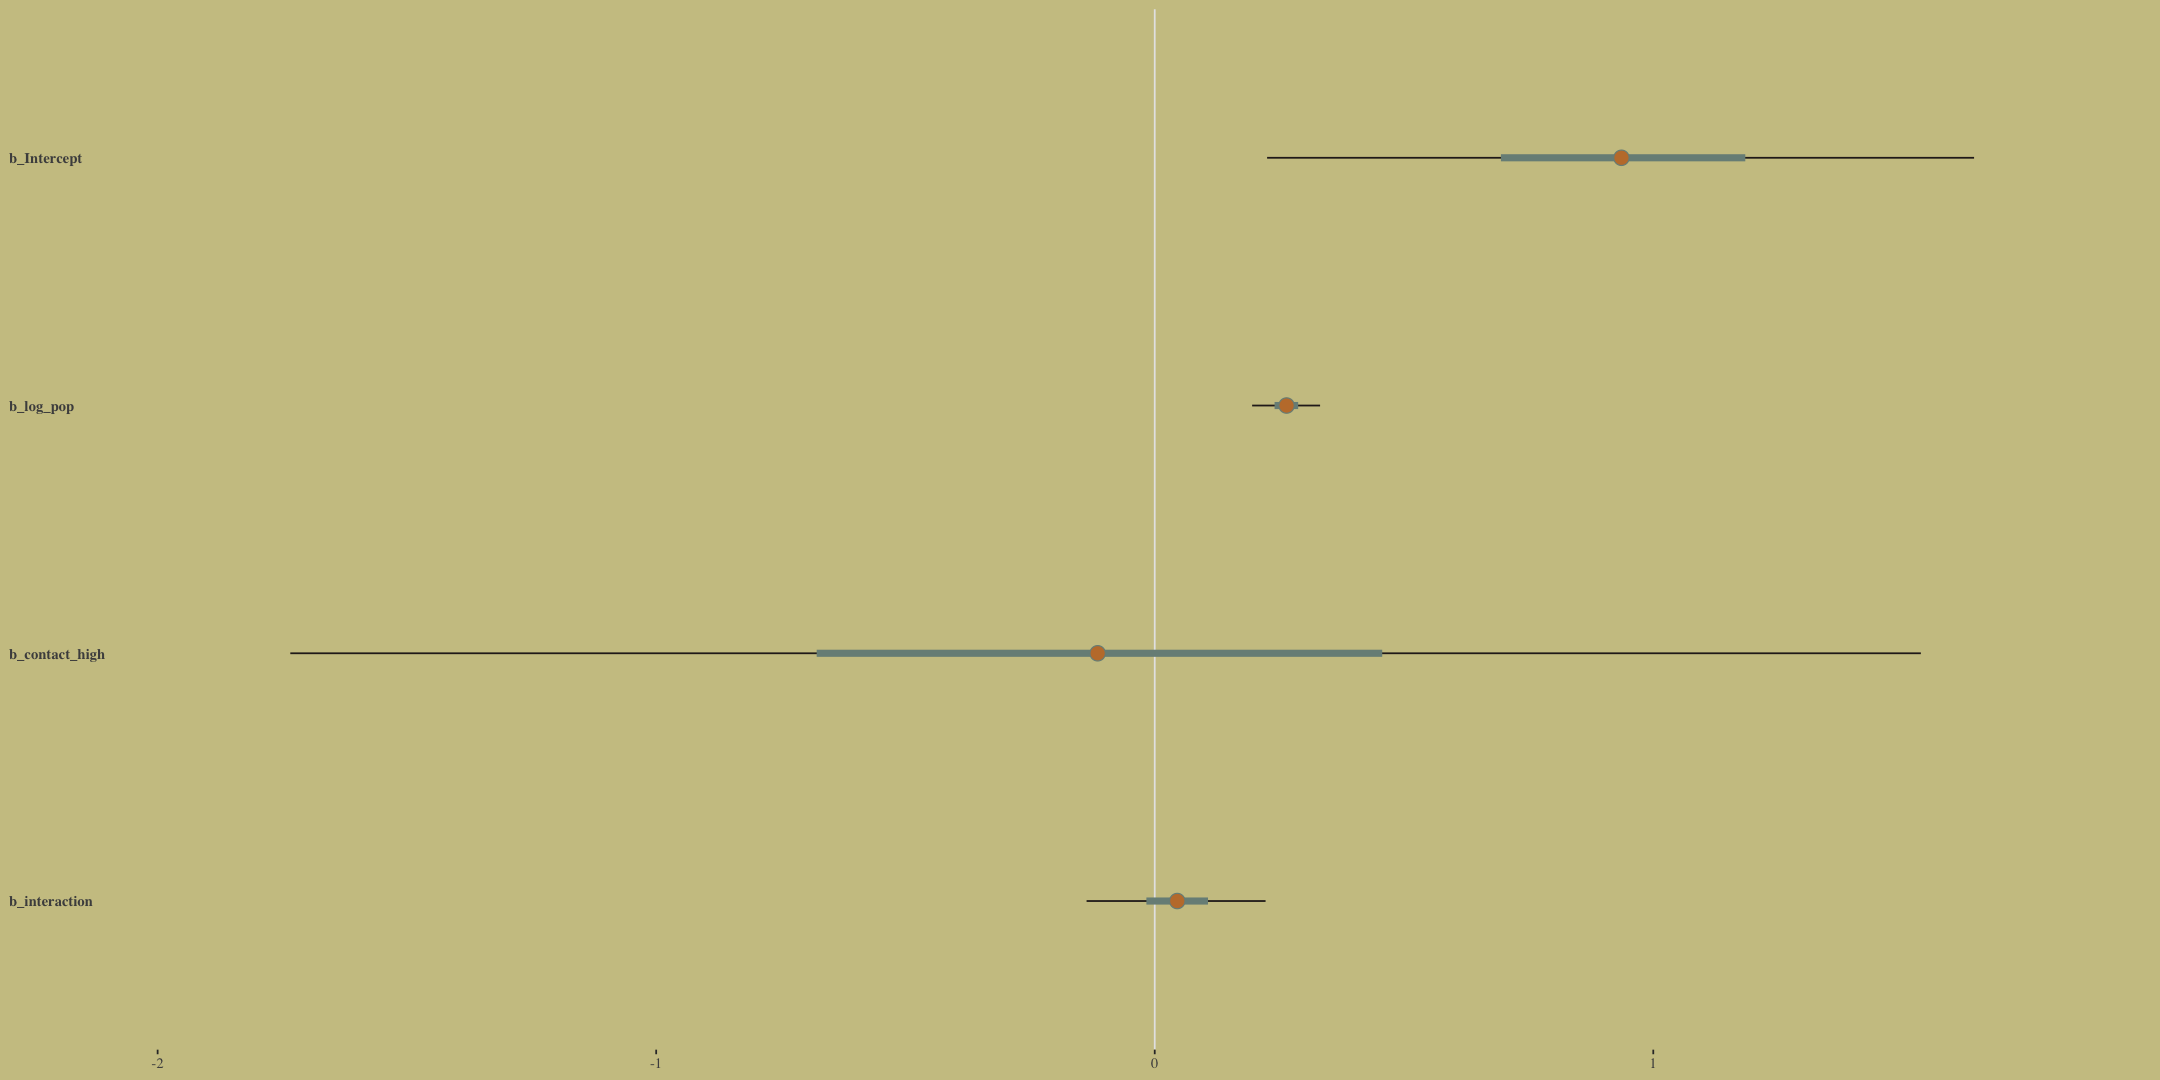

In [154]:
# 系数可视化

color_scheme_set(c(wes_palette("Moonrise2")[2],
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[4], 
                   wes_palette("Moonrise2")[2], 
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[1]))

post %>%
  select(-lp__) %>% 
  rename(b_interaction = `b_log_pop:contact_high`) %>%

  mcmc_intervals(prob = .5, prob_outer = .95) +
  theme(axis.ticks.y = element_blank(),
        axis.text.y  = element_text(hjust = 0))

可能会得出仅人口对数存在效应的结论，但是**你错了**。估计的结果表格总是很容易迷惑人  
考虑两个`log(population)`都是 8 的岛屿，但是其中一个和其他岛屿有密切接触，另外一个接触程度低。对每个岛屿计算工具数的期望λ。我们可以通过从后验分布中抽取样本，将这些样本代入线性模型中，然后对链接函数进行逆变换回到原观测尺度：  
`Formula: total_tools ~ 1 + log_pop + contact_high + contact_high:log_pop`

In [156]:
head(post)

b_Intercept b_log_pop b_contact_high b_log_pop:contact_high lp__     
1 0.9963679   0.2716786 -0.01515475    0.03150997             -46.11131
2 0.9223624   0.2774091 -0.02915328    0.03543503             -45.83849
3 1.0940589   0.2489092 -0.64897982    0.10335927             -44.07026
4 1.6070715   0.2049512 -0.11078065    0.03511606             -45.81177
5 0.5660461   0.2995178 -0.68149749    0.10959690             -44.77028
6 0.7249574   0.2755962 -0.22972487    0.08280222             -45.94549

In [143]:
# 高接触性孤岛比低接触性孤岛拥有更多工具的可能性有多大

post <-
  post %>%
  mutate(lambda_high = exp(b_Intercept + b_contact_high + (b_log_pop + `b_log_pop:contact_high`) * 8),
         lambda_low  = exp(b_Intercept + b_log_pop * 8)) %>% 
  mutate(diff        = lambda_high - lambda_low) 

post %>%
  summarise(sum = sum(diff > 0) / length(diff))

sum      
1 0.9552917

表明有95%的可能性高接触频率的岛屿对应的工具数比低接触频率的岛屿多

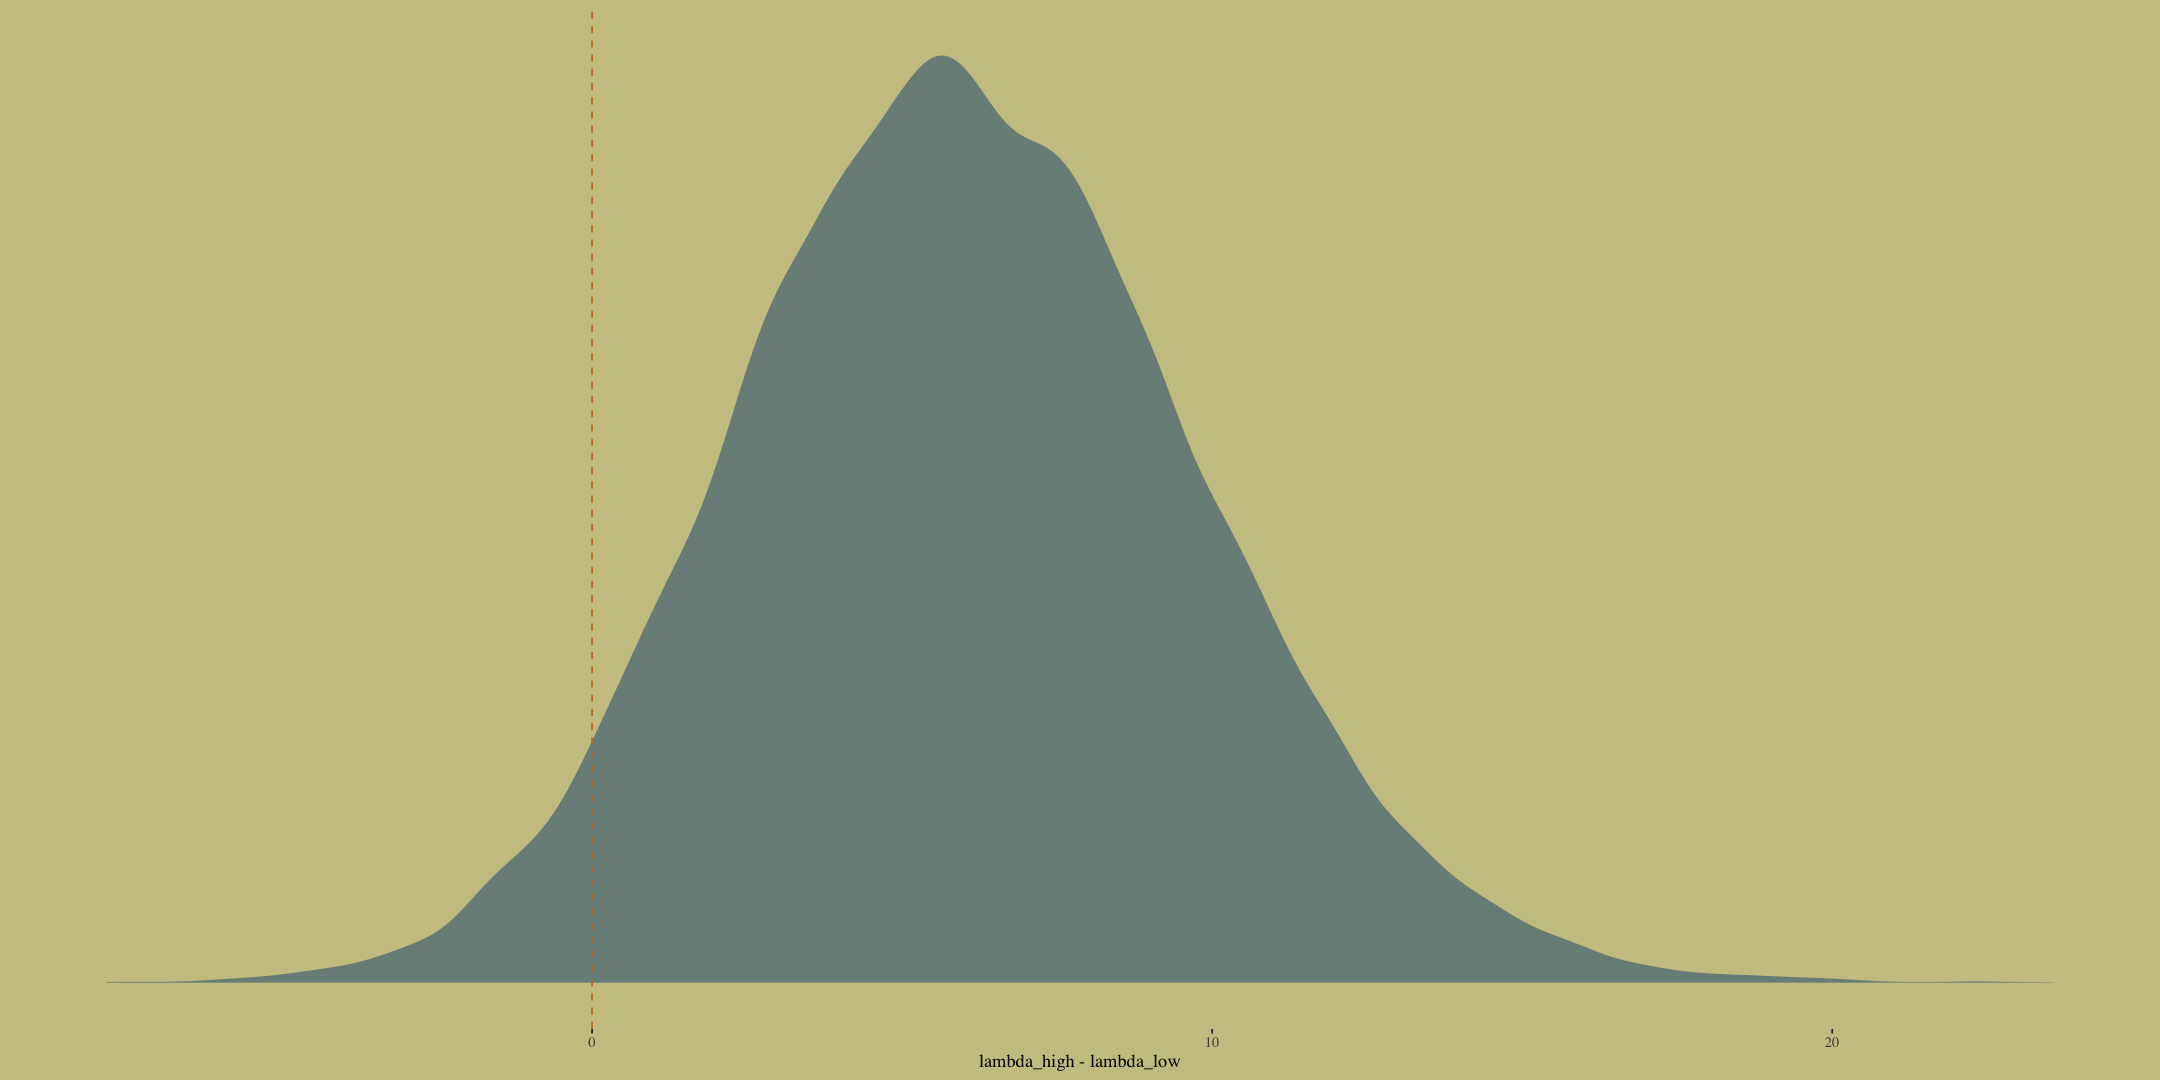

In [149]:
post %>%
  ggplot(aes(x = diff)) +
  geom_density(color = "transparent",
               fill = wes_palette("Moonrise2")[1]) +
  geom_vline(xintercept = 0, linetype = 2,
             color = wes_palette("Moonrise2")[2]) +
  scale_y_continuous(NULL, breaks = NULL) +
  labs(x = "lambda_high - lambda_low")

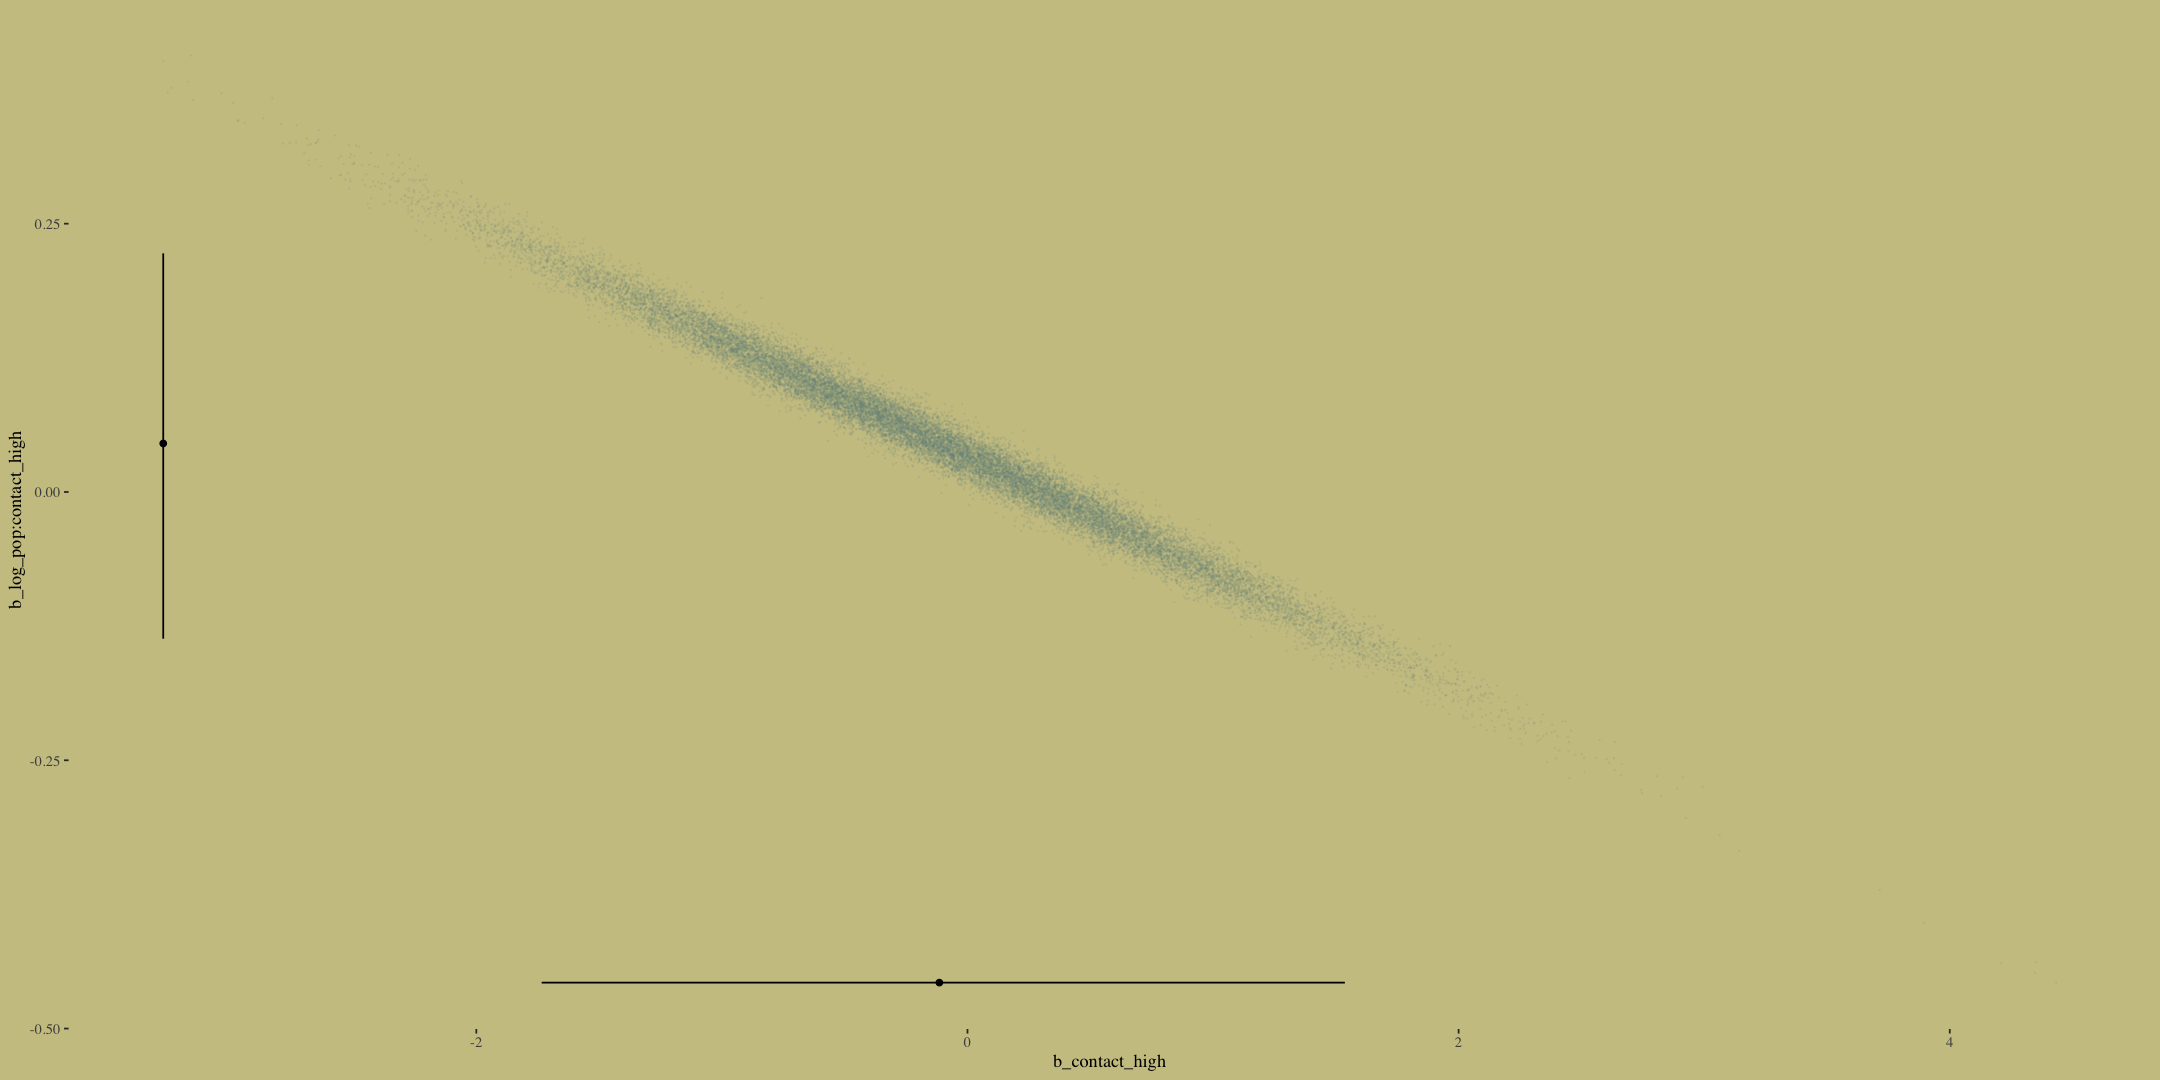

In [150]:
# intermediary tibbles for our the dot and line portoin of the plot
point_tibble <-
  tibble(x = c(median(post$b_contact_high), min(post$b_contact_high)),
         
         y = c(min(post$`b_log_pop:contact_high`), median(post$`b_log_pop:contact_high`)))

line_tibble <-
  tibble(parameter = rep(c("b_contact_high", "b_log_pop:contact_high"), each = 2),
         
         x = c(quantile(post$b_contact_high, probs = c(.025, .975)),
               rep(min(post$b_contact_high), times = 2)),
         
         y = c(rep(min(post$`b_log_pop:contact_high`), times = 2),
               quantile(post$`b_log_pop:contact_high`, probs = c(.025, .975))))

# the plot
post %>% 
  ggplot(aes(x = b_contact_high, y = `b_log_pop:contact_high`)) +
  geom_point(color = wes_palette("Moonrise2")[1],
             size = 1/10, alpha = 1/10) +
  geom_point(data = point_tibble,
             aes(x = x, y = y)) +
  geom_line(data = line_tibble,
            aes(x = x, y = y, group = parameter))

In [158]:
# 无交互
b10.11 <- 
  update(b10.10, formula = total_tools ~ 1 + log_pop + contact_high)

# 无沟通率
b10.12 <-
  update(b10.10, formula = total_tools ~ 1 + log_pop)

# 无人口对数
b10.13 <-
  update(b10.10, formula = total_tools ~ 1 + contact_high)

# 截距模型
b10.14 <-
  update(b10.10, formula = total_tools ~ 1,
         seed = 10)

b10.10 <- add_criterion(b10.10, criterion = "waic")
b10.11 <- add_criterion(b10.11, criterion = "waic")
b10.12 <- add_criterion(b10.12, criterion = "waic")
b10.13 <- add_criterion(b10.13, criterion = "waic")
b10.14 <- add_criterion(b10.14, criterion = "waic")

w <- loo_compare(b10.10, b10.11, b10.12, b10.13, b10.14, criterion = "waic")

cbind(waic_diff = w[, 1] * -2,
      se        = w[, 2] *  2) %>% 
  round(digits = 2)

Start sampling




SAMPLING FOR MODEL '89ce6e87a630d0fb0f631757eace6bfd' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.065776 seconds (Warm-up)
Chain 1:                0.226757 seconds (Samp

Start sampling




SAMPLING FOR MODEL '89ce6e87a630d0fb0f631757eace6bfd' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.055944 seconds (Warm-up)
Chain 1:                0.163091 seconds (Samp

Start sampling




SAMPLING FOR MODEL '89ce6e87a630d0fb0f631757eace6bfd' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.049558 seconds (Warm-up)
Chain 1:                0.141836 seconds (Samp

The desired updates require recompiling the model

Compiling the C++ model

Start sampling




SAMPLING FOR MODEL '81731f3345f94d3795dc12ccd3a3c600' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.037303 seconds (Warm-up)
Chain 1:                0.112696 seconds (Samp

waic_diff se   
b10.11  0.00      0.00
b10.10  1.25      1.34
b10.12  5.46      8.38
b10.14 62.59     34.56
b10.13 71.70     47.04

In [159]:
model_weights(b10.10, b10.11, b10.12, b10.13, b10.14, weights = "waic") %>% 
  round(digits = 2)

b10.10 b10.11 b10.12 b10.13 b10.14 
  0.33   0.63   0.04   0.00   0.00

In [163]:
model_weights(b10.10, b10.11, b10.12, b10.13, b10.14, weights = "loo") %>% 
  round(digits = 2)

b10.10 b10.11 b10.12 b10.13 b10.14 
  0.29   0.68   0.04   0.00   0.00

最优的两个模型同时包含两个预测变量，但是最优的模型`b10.11`没有包含这两个变量的交互效应。然而这两个模型都有很高的权重。这表明有截距的模型很可能过拟合；  
这里的结果清楚地表明接触率是重要的，虽然它的影响比`log(population)`要小。记得，所有形式的模型比较，信息理论或者其他都无法保证结果是对的。它们本身不过是关于袋外样本预测情况的模型，而不是什么神奇的占ト术。

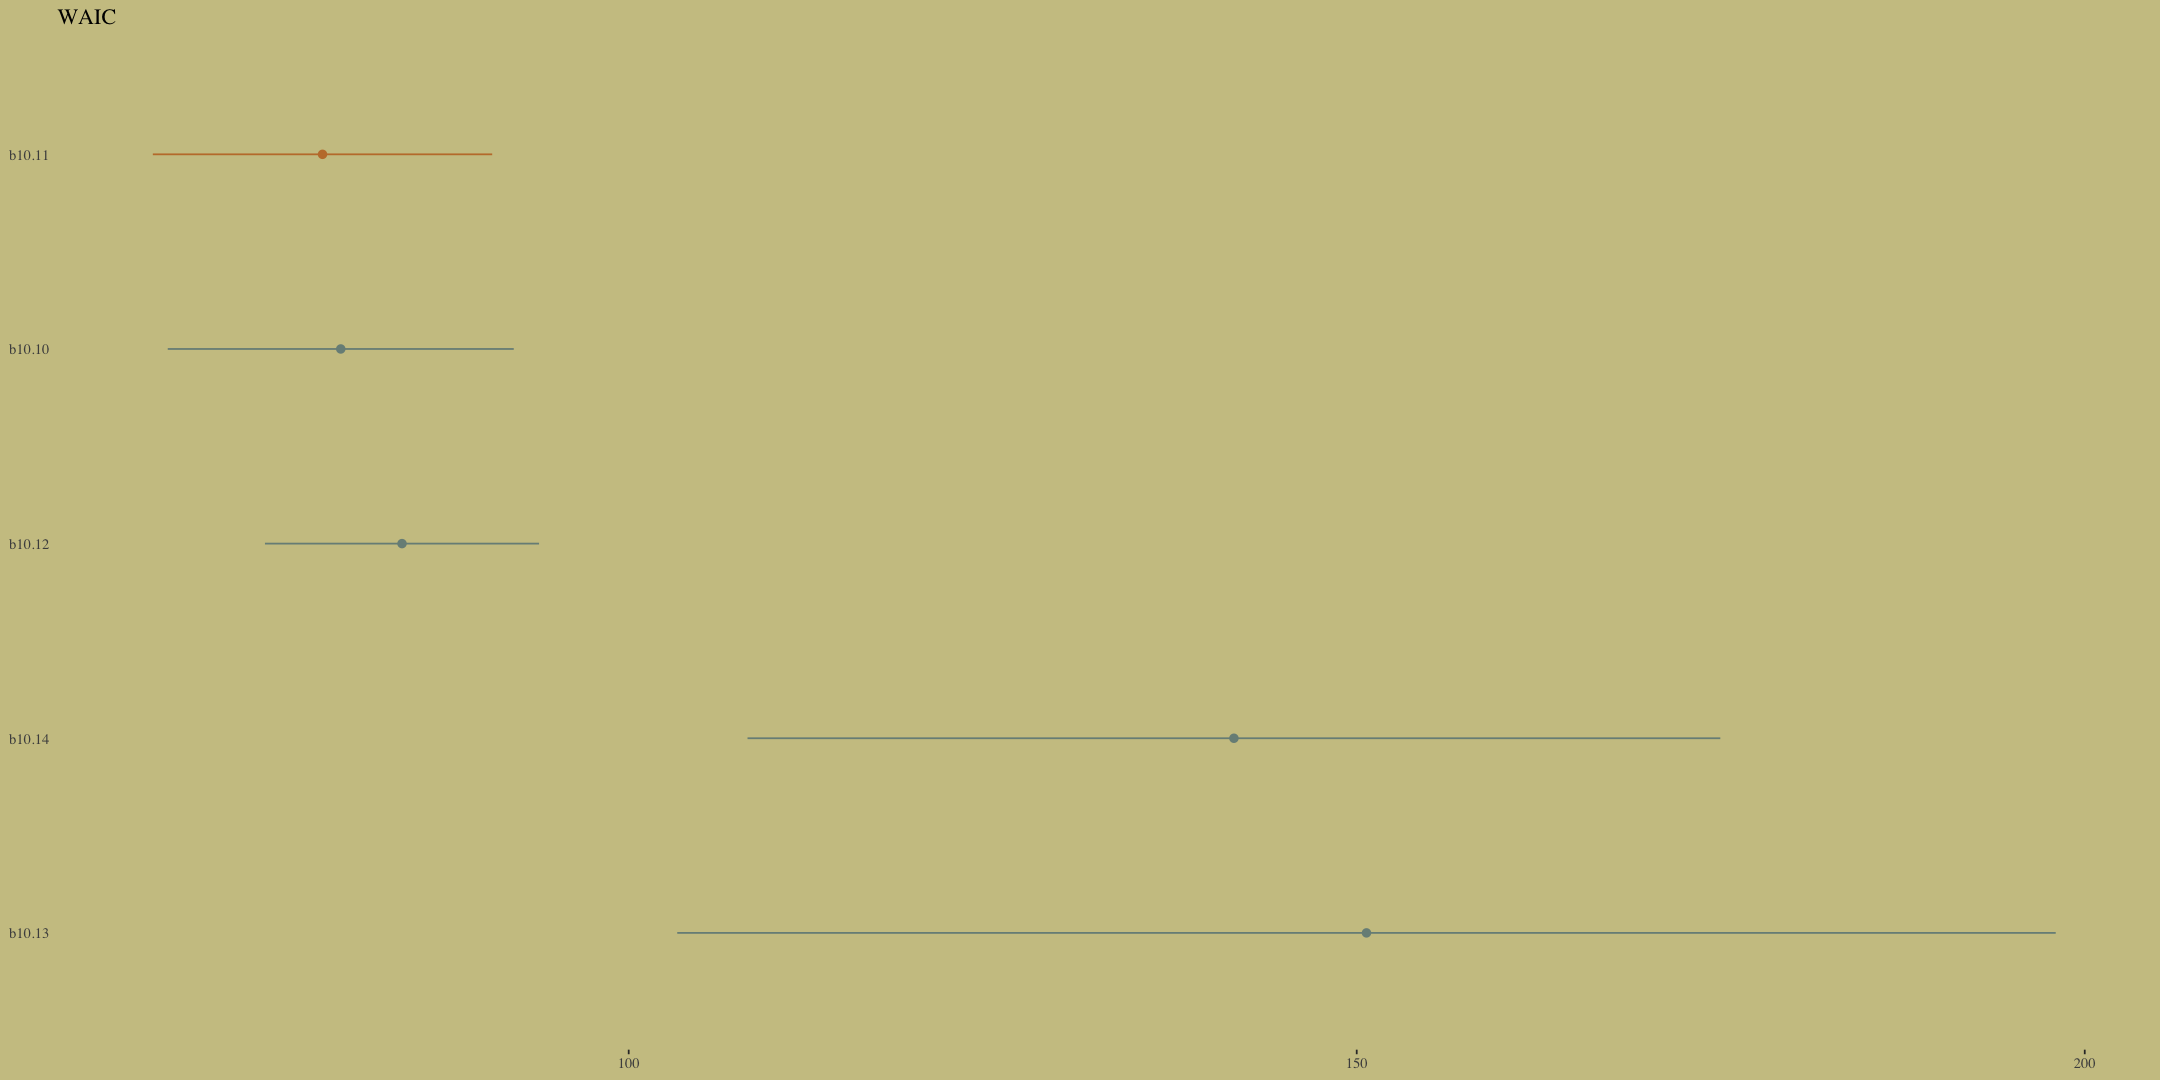

In [160]:
w %>% 
  data.frame() %>% 
  rownames_to_column(var = "model") %>%
  
  ggplot(aes(x = reorder(model, -waic), 
             y    = waic,
             ymin = waic - se_waic,
             ymax = waic + se_waic,
             color = model)) +
  geom_pointrange(shape = 16, show.legend = F) +
  scale_color_manual(values = wes_palette("Moonrise2")[c(1, 2, 1, 1, 1)]) +
  coord_flip() +
  labs(x = NULL, y = NULL,
       title = "WAIC") +
  theme(axis.ticks.y    = element_blank())

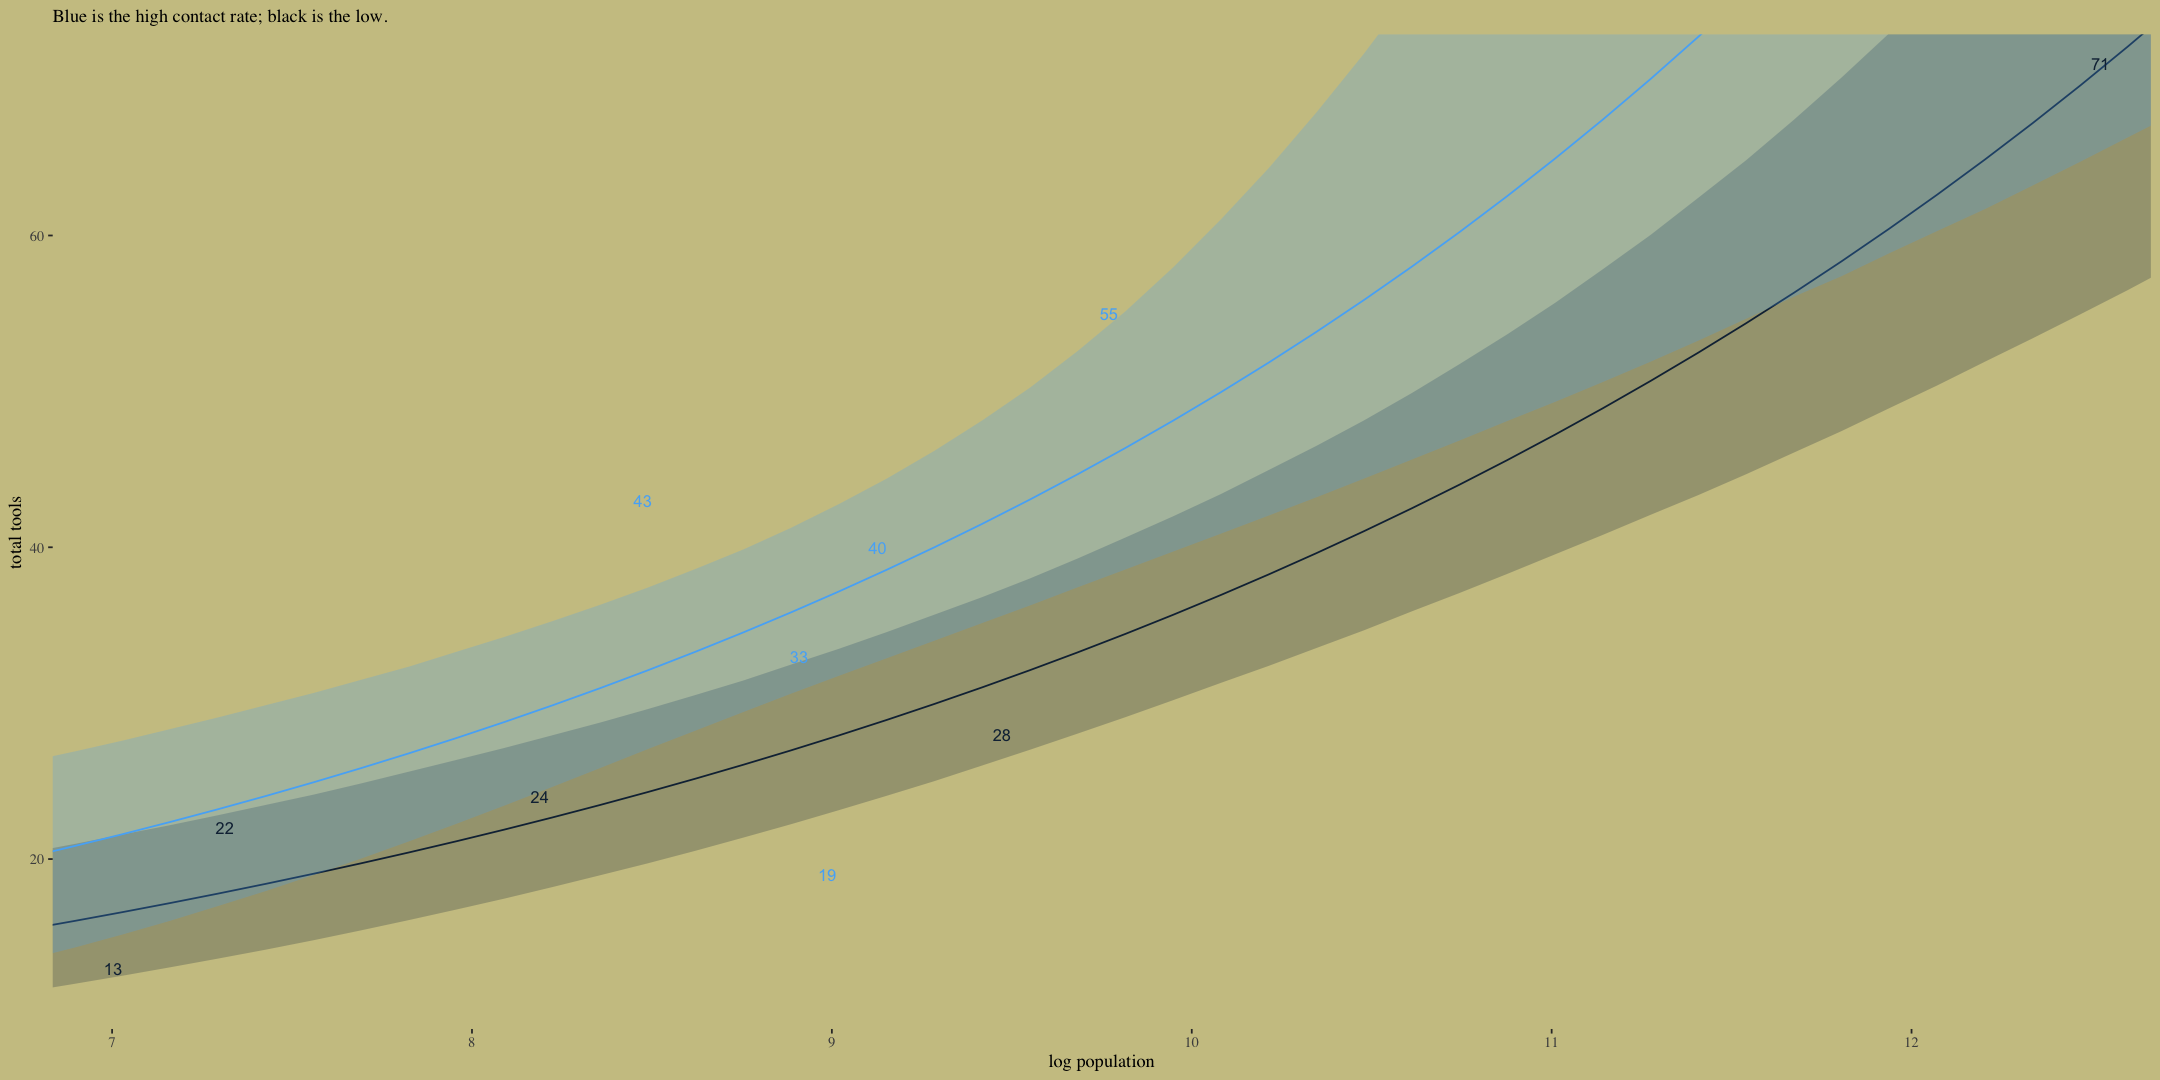

In [161]:
nd <-
  tibble(contact_high = 0:1) %>% 
  expand(contact_high,
         log_pop = seq(from = 6.5, to = 13, length.out = 50))

ppa <- 
  pp_average(b10.10, b10.11, b10.12,
             weights = "loo",            #此处使用loo权重
             method  = "fitted",
             newdata = nd) %>%
  as_tibble() %>%
  bind_cols(nd)

ppa %>%
  ggplot(aes(x     = log_pop,
             group = contact_high)) +
  geom_smooth(aes(y = Estimate, ymin = Q2.5, ymax = Q97.5,
                  fill = contact_high, color = contact_high),
              stat = "identity",
              alpha = 1/4, size = 1/2) +
  geom_text(data = d, 
             aes(y     = total_tools,
                 label = total_tools,
                 color = contact_high),
             size = 3.5) +
  coord_cartesian(xlim = c(7.1, 12.4),
                  ylim = c(12, 70)) +
  labs(x = "log population",
       y = "total tools",
       subtitle = "Blue is the high contact rate; black is the low.") +
  theme(legend.position = "none",
        panel.border    = element_blank())

## 岛屿MCMC

In [164]:
print(b10.10)

 Family: poisson 
  Links: mu = log 
Formula: total_tools ~ 1 + log_pop + contact_high + contact_high:log_pop 
   Data: d (Number of observations: 10) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                0.94      0.36     0.23     1.64 1.00    12264
log_pop                  0.26      0.03     0.20     0.33 1.00    12761
contact_high            -0.11      0.84    -1.73     1.54 1.00     8664
log_pop:contact_high     0.04      0.09    -0.14     0.22 1.00     8581
                     Tail_ESS
Intercept               12321
log_pop                 11345
contact_high            10867
log_pop:contact_high    10625

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence

In [168]:
# 对人口对数进行中心化
d <-
  d %>%
  mutate(log_pop_c = log_pop - mean(log_pop))
d

culture    population contact total_tools mean_TU log_pop   contact_high
1  Malekula     1100     low     13          3.2      7.003065 0           
2  Tikopia      1500     low     22          4.7      7.313220 0           
3  Santa Cruz   3600     low     24          4.0      8.188689 0           
4  Yap          4791     high    43          5.0      8.474494 1           
5  Lau Fiji     7400     high    33          5.0      8.909235 1           
6  Trobriand    8000     high    19          4.0      8.987197 1           
7  Chuuk        9200     high    40          3.8      9.126959 1           
8  Manus       13000     low     28          6.6      9.472705 0           
9  Tonga       17500     high    55          5.4      9.769956 1           
10 Hawaii     275000     low     71          6.6     12.524526 0           
   log_pop_c  
1  -1.97393929
2  -1.66378436
3  -0.78831562
4  -0.50251031
5  -0.06776947
6   0.01019208
7   0.14995402
8   0.49569989
9   0.79295142
10  3.54752163

In [174]:
b10.10_c <-
  brm(data = d, family = poisson,
      total_tools ~ 1 + log_pop_c + contact_high + contact_high:log_pop_c,
      prior = c(prior(normal(0, 10), class = Intercept),
                prior(normal(0, 1), class = b)),
      iter = 8000, warmup = 2000, chains = 4, cores = 4,
      seed = 10)

print(b10.10_c)

Compiling the C++ model

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: total_tools ~ 1 + log_pop_c + contact_high + contact_high:log_pop_c 
   Data: d (Number of observations: 10) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                  3.31      0.09     3.13     3.48 1.00    18334
log_pop_c                  0.26      0.04     0.19     0.33 1.00    19808
contact_high               0.28      0.12     0.05     0.52 1.00    20458
log_pop_c:contact_high     0.07      0.17    -0.27     0.40 1.00    21080
                       Tail_ESS
Intercept                 17245
log_pop_c                 17387
contact_high              16910
log_pop_c:contact_high    17872

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on spli

Warning message:
“Only one chain in 'x'. This plot is more useful with multiple chains.”
Warning message:
“Only one chain in 'x'. This plot is more useful with multiple chains.”


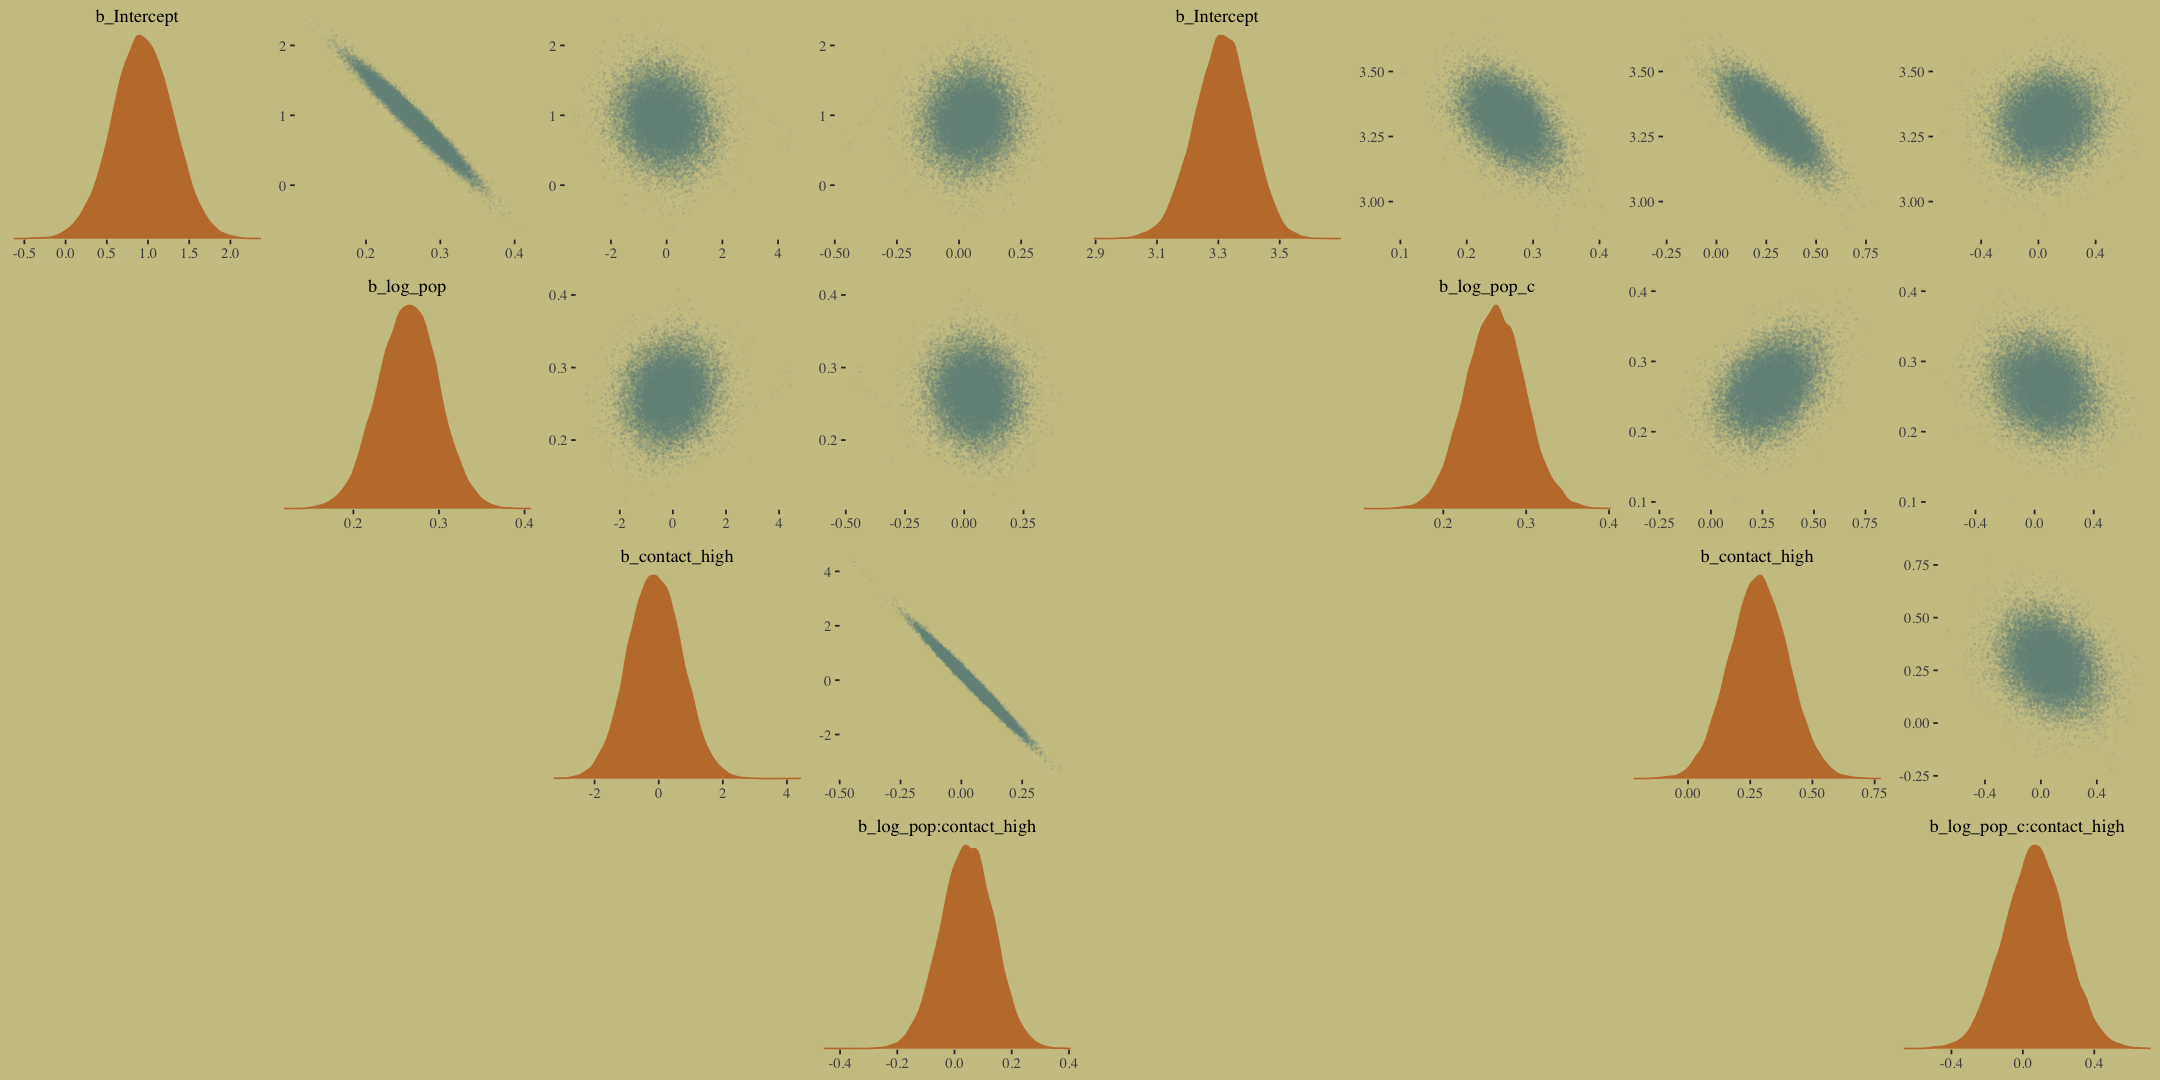

In [177]:
# this helps us set our custom color scheme
color_scheme_set(c(wes_palette("Moonrise2")[3], 
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[2], 
                   wes_palette("Moonrise2")[2], 
                   wes_palette("Moonrise2")[1], 
                   wes_palette("Moonrise2")[1]))

# 原始数据绘图
p1 = mcmc_pairs(x = posterior_samples(b10.10),
           pars = c("b_Intercept", "b_log_pop", "b_contact_high", "b_log_pop:contact_high"),
           off_diag_args = list(size = 1/10, alpha = 1/10),
           diag_fun = "dens")

#中心化后进行绘图
p2 = mcmc_pairs(x = posterior_samples(b10.10_c),
           pars = c("b_Intercept", "b_log_pop_c", "b_contact_high", "b_log_pop_c:contact_high"),
           off_diag_args = list(size = 1/10, alpha = 1/10),
           diag_fun = "dens")

cowplot::plot_grid(p1, p2, ncol = 2)

In [178]:
psych::lowerCor(posterior_samples(b10.10)[, 1:4])

                       b_Int b_lg_ b_cn_ b__:_
b_Intercept             1.00                  
b_log_pop              -0.98  1.00            
b_contact_high         -0.13  0.13  1.00      
b_log_pop:contact_high  0.07 -0.08 -0.99  1.00


In [179]:
psych::lowerCor(posterior_samples(b10.10_c)[, 1:4])

                         b_Int b_l__ b_cn_ b___:
b_Intercept               1.00                  
b_log_pop_c              -0.46  1.00            
b_contact_high           -0.77  0.36  1.00      
b_log_pop_c:contact_high  0.10 -0.20 -0.27  1.00


## 曝光与抵消项

In [181]:
set.seed(10)

num_days  <- 30
y         <- rpois(num_days, 1.5)          # 日产出泊松分布模拟

num_weeks <- 4
y_new     <- rpois(num_weeks, 0.5 * 7)     # 周产出泊松分布模拟

(
  d <- 
  tibble(y         = c(y, y_new), 
         days      = c(rep(1, num_days), rep(7, num_weeks)),
         monastery = c(rep(0, num_days), rep(1, num_weeks))) %>%
  mutate(log_days  = log(days))            # 取曝光对数
)

y days monastery log_days
1  1 1    0         0.00000 
2  1 1    0         0.00000 
3  1 1    0         0.00000 
4  2 1    0         0.00000 
5  0 1    0         0.00000 
6  1 1    0         0.00000 
7  1 1    0         0.00000 
8  1 1    0         0.00000 
9  2 1    0         0.00000 
10 1 1    0         0.00000 
11 2 1    0         0.00000 
12 2 1    0         0.00000 
13 0 1    0         0.00000 
14 2 1    0         0.00000 
15 1 1    0         0.00000 
16 1 1    0         0.00000 
17 0 1    0         0.00000 
18 1 1    0         0.00000 
19 1 1    0         0.00000 
20 3 1    0         0.00000 
21 3 1    0         0.00000 
22 2 1    0         0.00000 
23 2 1    0         0.00000 
24 1 1    0         0.00000 
25 1 1    0         0.00000 
26 2 1    0         0.00000 
27 3 1    0         0.00000 
28 1 1    0         0.00000 
29 2 1    0         0.00000 
30 1 1    0         0.00000 
31 3 7    1         1.94591 
32 1 7    1         1.94591 
33 2 7    1         1.94591 
34 6 7    1         1.94591

When you use `offset()`, `brm()` fixes the value. Thus there is no parameter estimate for the `offset()`. It’s a fixed part of the model not unlike the ν parameter of the Student-t distribution gets fixed to infinity when you use the Gaussian likelihood.

In [193]:
b10.15 <-
  brm(data = d, family = poisson,
      y ~ 1 + offset(log_days) + monastery,
      prior = c(prior(normal(0, 100), class = Intercept),
                prior(normal(0, 1), class = b)),
      iter = 8000, warmup = 2000, cores = 4, chains = 4,
      seed = 10)

print(b10.15)

Compiling the C++ model

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: y ~ 1 + offset(log_days) + monastery 
   Data: d (Number of observations: 34) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.30      0.16    -0.02     0.59 1.00    12574    13418
monastery    -1.10      0.31    -1.71    -0.51 1.00    14460    15056

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [194]:
library(tidybayes)

posterior_samples(b10.15) %>%
  transmute(lambda_old = exp(b_Intercept),
            lambda_new = exp(b_Intercept + b_monastery)) %>%
  gather() %>%
  mutate(key = factor(key, levels = c("lambda_old", "lambda_new"))) %>%
  group_by(key) %>%
  mean_hdi(value, .width = .89) %>% 
  mutate_if(is.double, round, digits = 2)

key        value .lower .upper .width .point .interval
1 lambda_old 1.36  1.03   1.70   0.89   mean   hdi      
2 lambda_new 0.47  0.27   0.65   0.89   mean   hdi

# 其它计数回归

## 多项分布
$$\operatorname{Pr}\left(y_{1}, \ldots, y_{K} | n, p_{1}, \ldots, p_{K}\right)=\frac{n !}{\prod_{i} y_{i} !} \prod_{i=1}^{K} p_{i}^{y_{i}}$$

### 直接多项模型(Sofmax)
$$\operatorname{Pr}\left(k | s_{1}, s_{2}, \ldots, s_{K}\right)=\frac{\exp \left(s_{k}\right)}{\sum_{i=1}^{K} \exp \left(s_{i}\right)}$$

Warning message:
“Calling `as_tibble()` on a vector is discouraged, because the behavior is likely to change in the future. Use `tibble::enframe(name = NULL)` instead.
This warning is displayed once per session.”


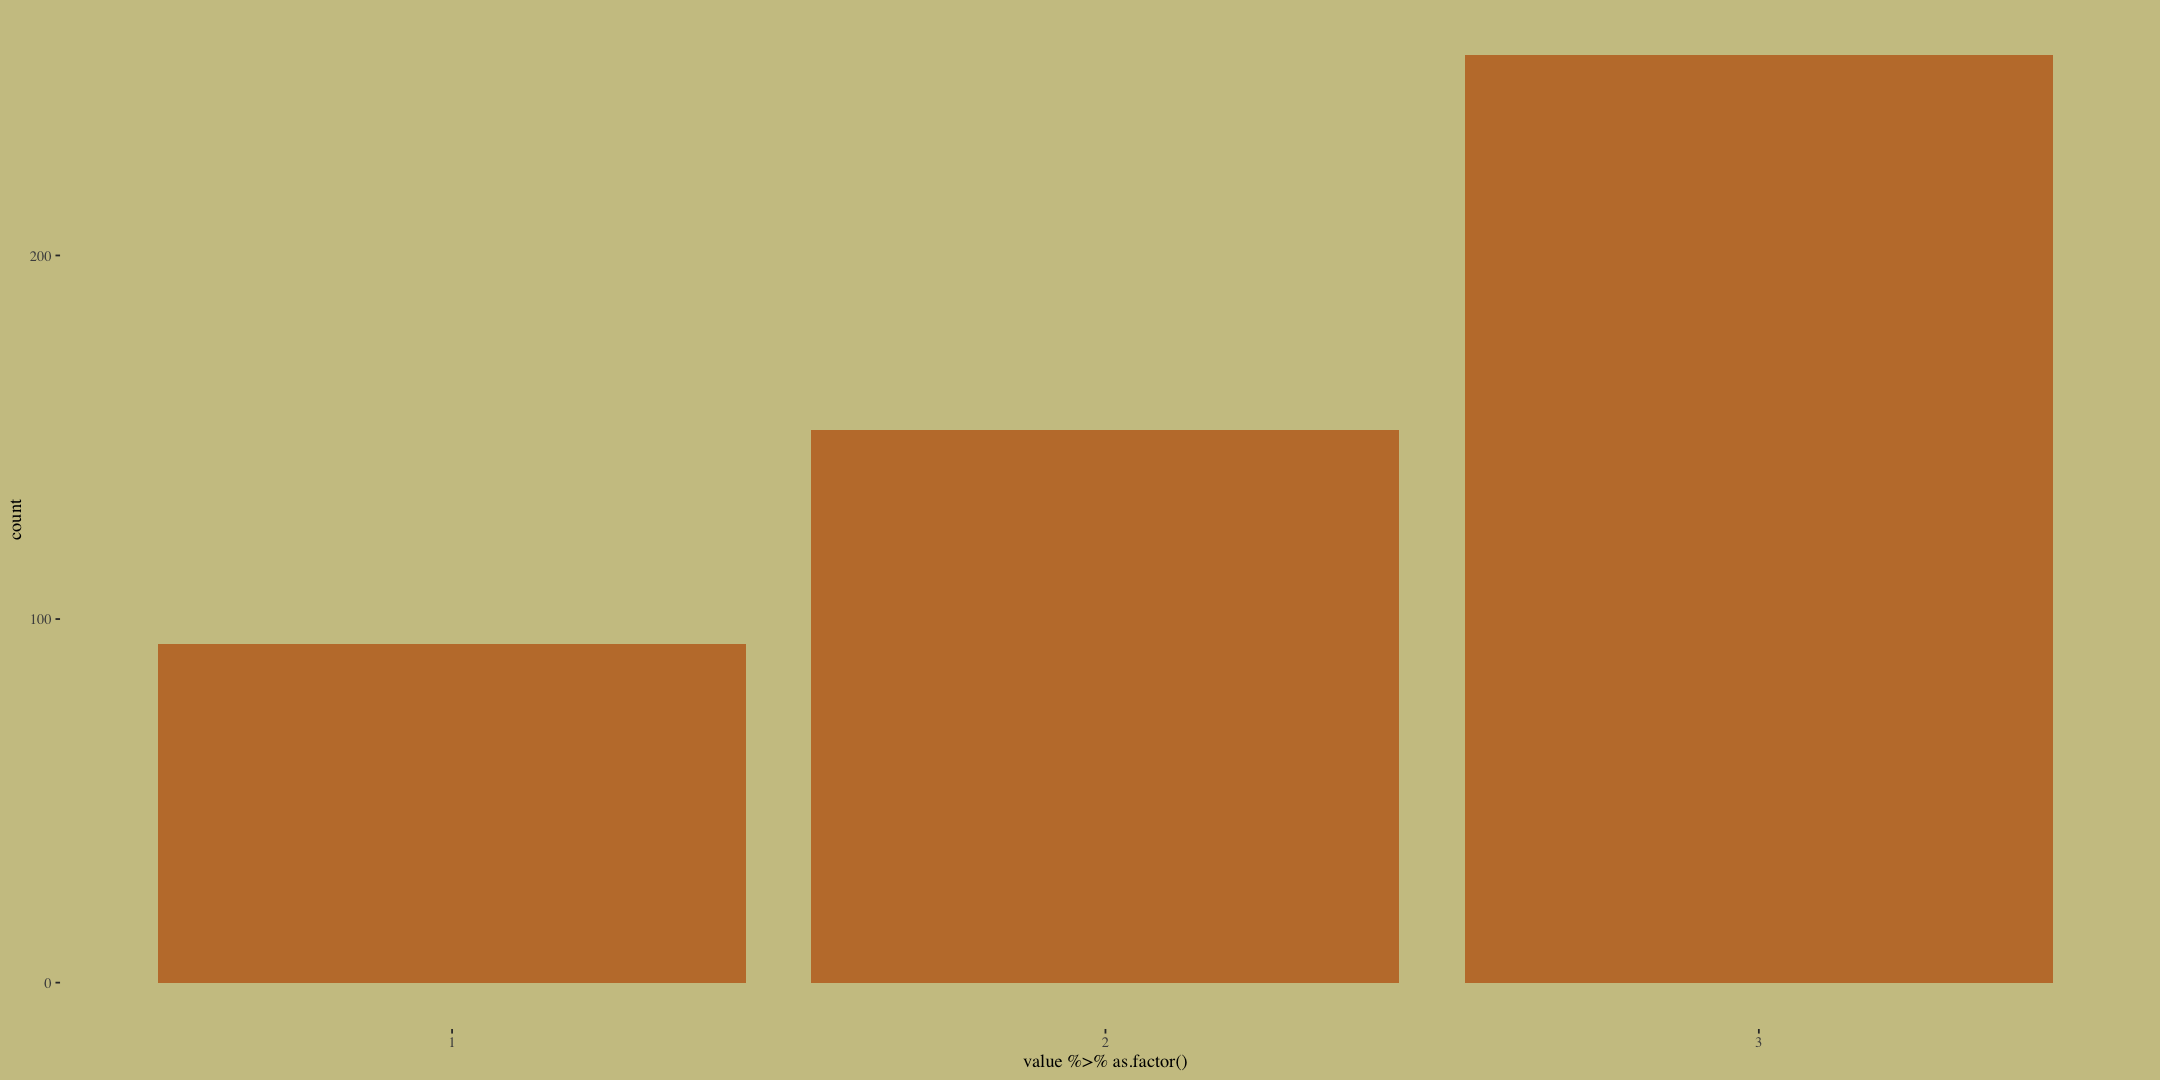

In [196]:
library(rethinking)

# simulate career choices among 500 individuals
n      <- 500           # number of individuals
income <- 1:3           # expected income of each career
score  <- 0.5 * income  # scores for each career, based on income

# next line converts scores to probabilities
p <- softmax(score[1], score[2], score[3])

# now simulate choice
# outcome career holds event type values, not counts
career <- rep(NA, n)  # empty vector of choices for each individual

set.seed(10)
# sample chosen career for each individual
for(i in 1:n) career[i] <- sample(1:3, size = 1, prob = p)

career %>%
  as_tibble() %>%
  ggplot(aes(x = value %>% as.factor())) +
  geom_bar(size = 0, fill = wes_palette("Moonrise2")[2])

In [197]:
detach(package:rethinking, unload = T)
library(brms)

b10.16 <-
  brm(data = list(career = career), 
      family = categorical(link = logit),
      career ~ 1,
      prior(normal(0, 5), class = Intercept),
      iter = 8000, warmup = 2000, cores = 4, chains = 4,
      seed = 10)


print(b10.16)

Warning message:
“Specifying global priors for regression coefficients in categorical models is deprecated and may not work as expected.”
Compiling the C++ model

Start sampling



 Family: categorical 
  Links: mu2 = logit; mu3 = logit 
Formula: career ~ 1 
   Data: list(career = career) (Number of observations: 500) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
mu2_Intercept     0.49      0.13     0.23     0.76 1.00     7571    11191
mu3_Intercept     1.01      0.12     0.77     1.25 1.00     8121    11229

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [198]:
library(rethinking)

n <- 100

set.seed(10)
# simulate family incomes for each individual
family_income <- runif(n)

# assign a unique coefficient for each type of event
b      <- (1:-1)
career <- rep(NA, n)  # empty vector of choices for each individual

for (i in 1:n) {
    score     <- 0.5 * (1:3) + b * family_income[i]
    p         <- softmax(score[1], score[2], score[3])
    career[i] <- sample(1:3, size = 1, prob = p)
}

detach(package:rethinking, unload = T)
library(brms)


b10.17 <-
  brm(data = list(career        = career,  # note how we used a list instead of a tibble
                  family_income = family_income), 
      family = categorical(link = logit),
      career ~ 1 + family_income,
      prior = c(prior(normal(0, 5), class = Intercept),
                prior(normal(0, 5), class = b)),
      iter = 8000, warmup = 2000, cores = 4, chains = 4,
      seed = 10)


print(b10.17)

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:loo’:

    compare


The following object is masked from ‘package:purrr’:

    map


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:stats’:

    rstudent


Warning message:
“Specifying global priors for regression coefficients in categorical models is deprecated and may not work as expected.”
Warning message:
“Specifying global priors for regression coefficients in categorical models is deprecated and may not work as expected.”
Compiling the C++ model

Start sampling



 Family: categorical 
  Links: mu2 = logit; mu3 = logit 
Formula: career ~ 1 + family_income 
   Data: list(career = career, family_income = family_incom (Number of observations: 100) 
Samples: 4 chains, each with iter = 8000; warmup = 2000; thin = 1;
         total post-warmup samples = 24000

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
mu2_Intercept         1.02      0.54    -0.02     2.10 1.00    15335    15924
mu3_Intercept         1.04      0.53     0.01     2.09 1.00    15932    16438
mu2_family_income    -1.77      0.99    -3.76     0.16 1.00    17231    16862
mu3_family_income    -1.74      0.99    -3.71     0.16 1.00    16482    16794

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


### 泊松版本的多项回归

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:loo’:

    compare


The following object is masked from ‘package:purrr’:

    map


The following objects are masked from ‘package:brms’:

    LOO, stancode, WAIC


The following object is masked from ‘package:stats’:

    rstudent


Compiling the C++ model

Start sampling

Setting 'rescor' to FALSE by default for this model

Warning message:
“Specifying global priors for regression coefficients in multivariate models is deprecated and may not work as expected.”
Compiling the C++ model

Start sampling



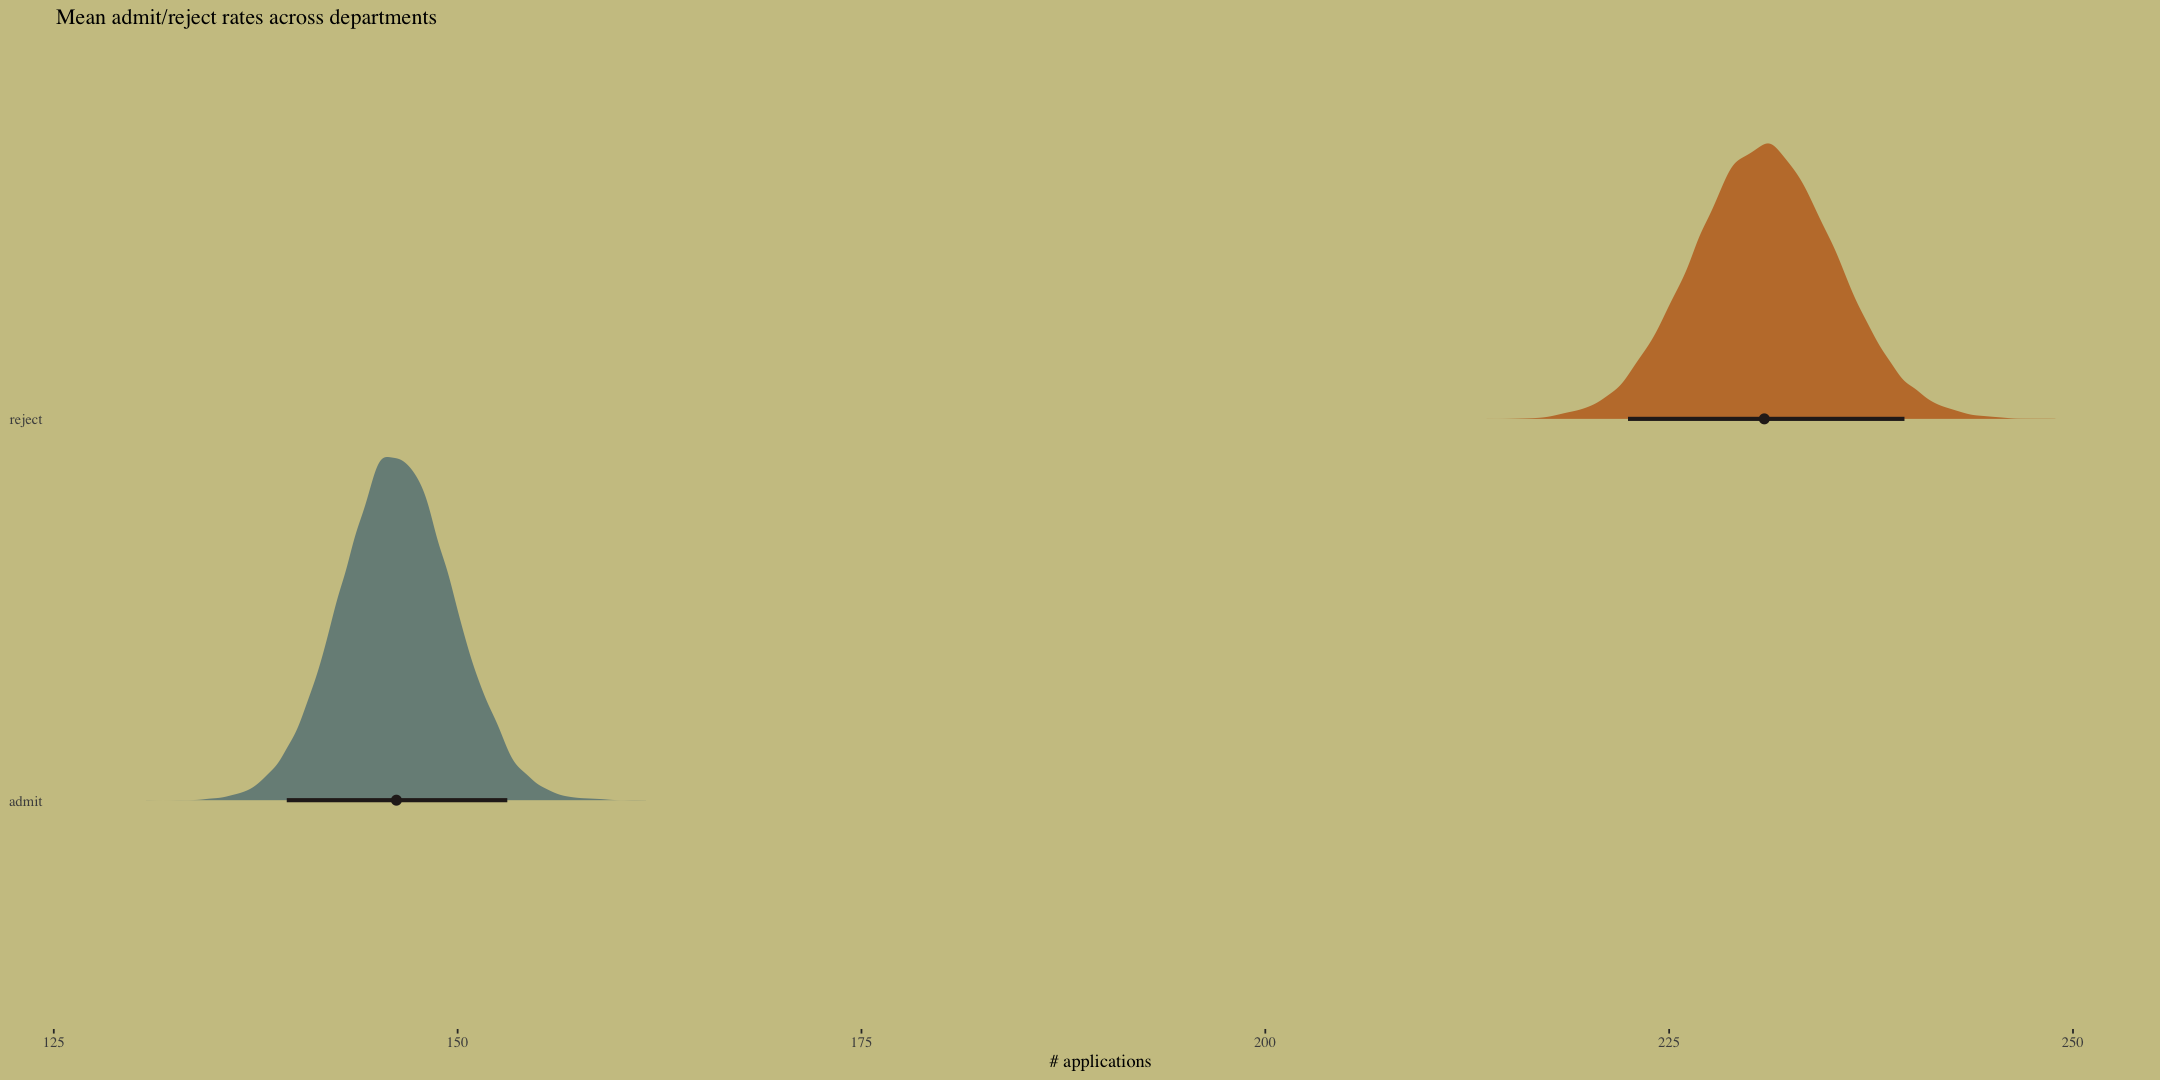

In [201]:
library(rethinking)

data(UCBadmit)
d <- UCBadmit
rm(UCBadmit)

detach(package:rethinking, unload = T)
library(brms)


# 总体录取率的二项模型
b_binom <-
  brm(data = d, family = binomial,
      admit | trials(applications) ~ 1,
      prior(normal(0, 100), class = Intercept),
      iter = 20000, warmup = 10000, cores = 4, chains = 4,
      seed = 10)

# 总体录取率和拒绝率的泊松模型
b_pois <-
  brm(data = d %>%
        mutate(rej = reject),  # 'reject' is a reserved word
      family = poisson,
      mvbind(admit, rej) ~ 1,
      prior(normal(0, 100), class = Intercept),
      iter = 20000, warmup = 10000, cores = 4, chains = 4,
      seed = 10)

# extract the samples
post <- posterior_samples(b_pois)

# wrangle
post %>%
  transmute(admit  = exp(b_admit_Intercept), 
            reject = exp(b_rej_Intercept)) %>% 
  gather() %>% 
  
  # plot
  ggplot(aes(x = value, y = key, fill = key)) +
  geom_halfeyeh(point_interval = median_qi, .width = .95,
                color = wes_palette("Moonrise2")[4]) +
  scale_fill_manual(values = c(wes_palette("Moonrise2")[1],
                               wes_palette("Moonrise2")[2])) +
  labs(title = " Mean admit/reject rates across departments",
       x     = "# applications",
       y     = NULL) +
  theme(legend.position = "none",
        axis.ticks.y    = element_blank())

In [202]:
print(b_binom)
cat("==============================================\n")
print(b_pois)

 Family: binomial 
  Links: mu = logit 
Formula: admit | trials(applications) ~ 1 
   Data: d (Number of observations: 12) 
Samples: 4 chains, each with iter = 20000; warmup = 10000; thin = 1;
         total post-warmup samples = 40000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.46      0.03    -0.52    -0.40 1.00    14611    19902

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).
 Family: MV(poisson, poisson) 
  Links: mu = log
         mu = log 
Formula: admit ~ 1 
         rej ~ 1 
   Data: d %>% mutate(rej = reject) (Number of observations: 12) 
Samples: 4 chains, each with iter = 20000; warmup = 10000; thin = 1;
         total post-warmup samples = 40000

Population-Level Effects: 
                Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail

In [205]:
# 二项模型结果暗示的录取率
fixef(b_binom)[ ,"Estimate"] %>%
  inv_logit_scaled()

# 泊松模型结果暗示的录取率
k <- 
  fixef(b_pois) %>%
  as.numeric()

exp(k[1]) / (exp(k[1]) + exp(k[2]))

[1] 0.3876771

[1] 0.3877338

## 几何分布
$$\operatorname{Pr}(y | p)=p(1-p)^{y-1}$$

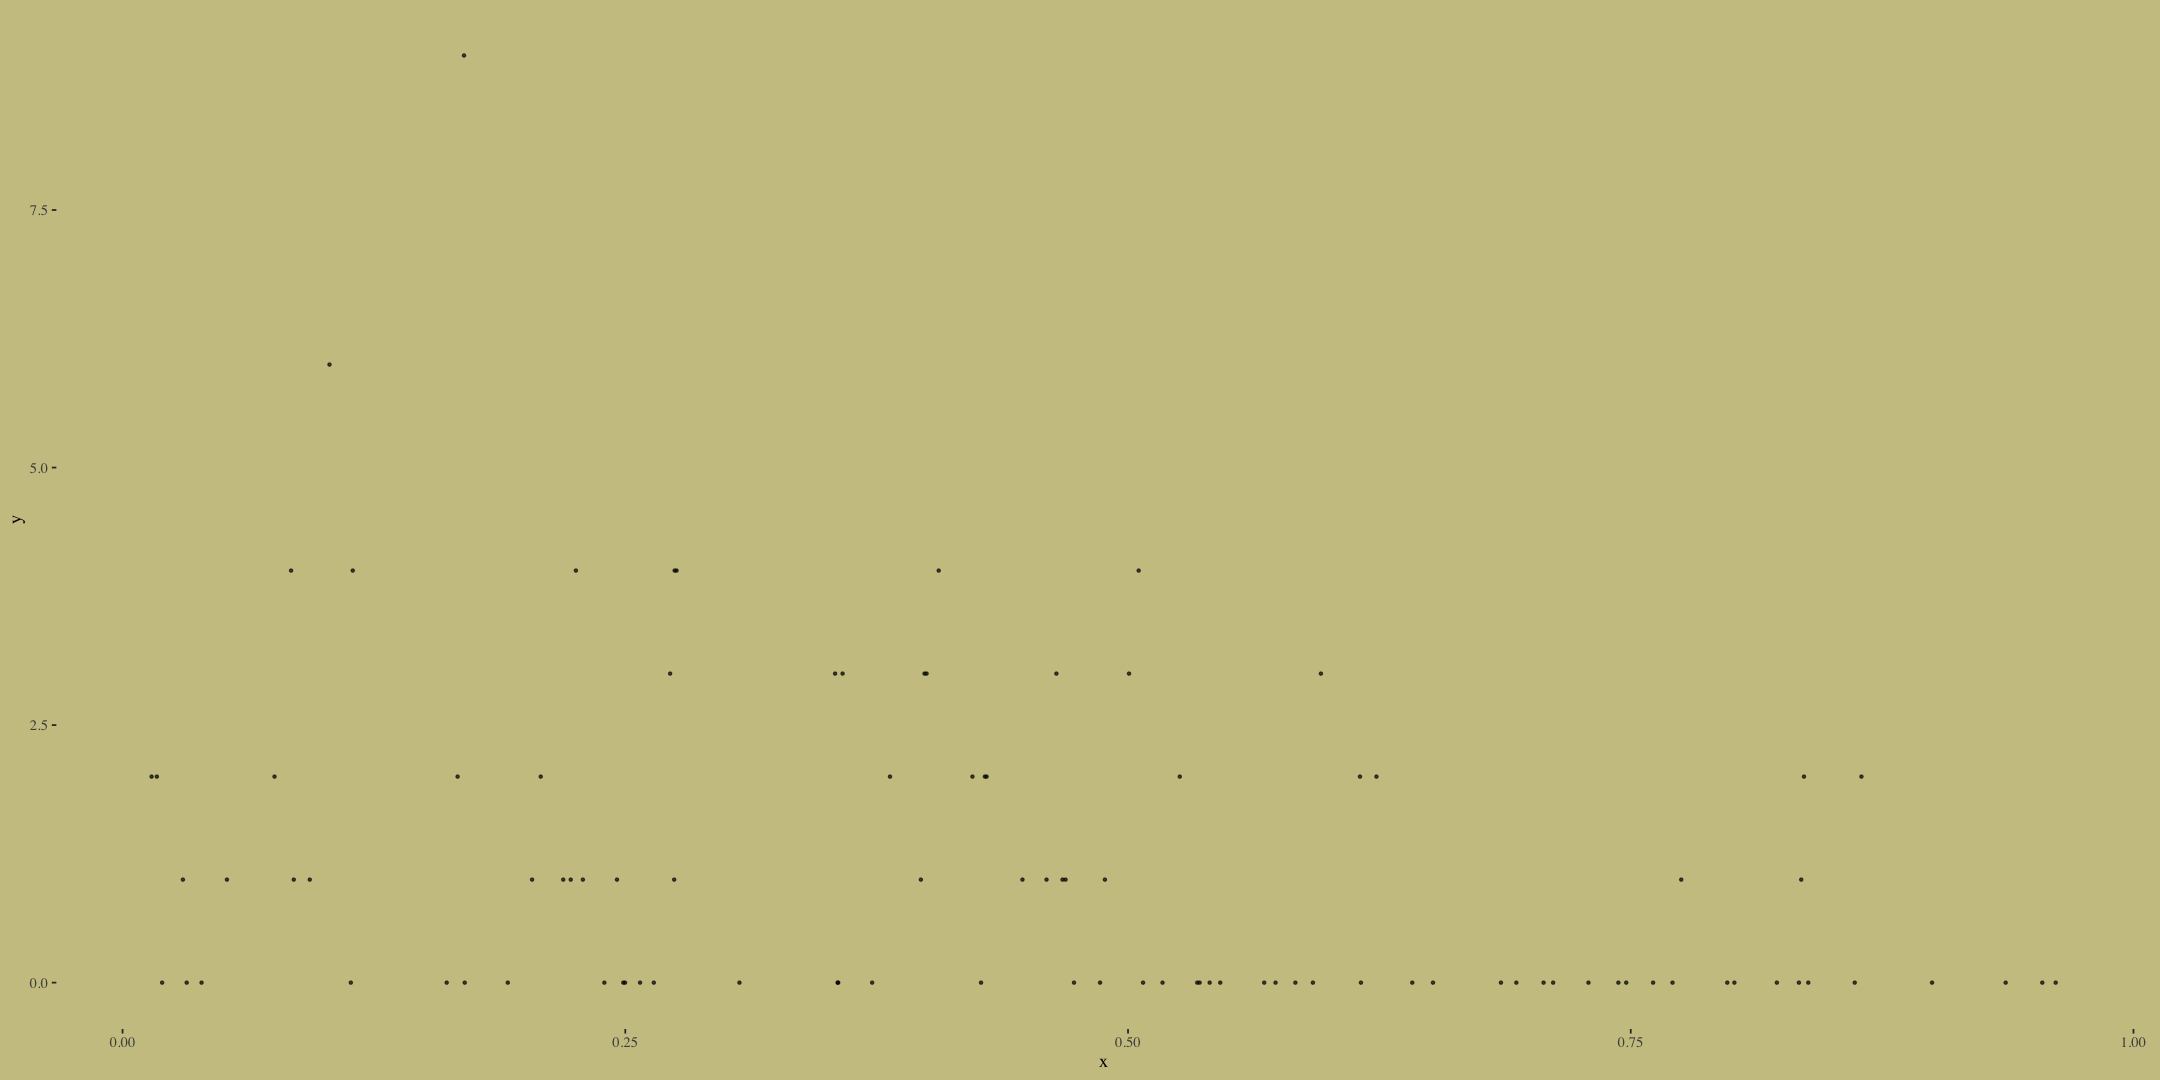

In [207]:
# simulate
n <- 100
set.seed(10)
x <- runif(n)

set.seed(10)
y <- rgeom(n, prob = inv_logit_scaled(-1 + 2 * x))

list(y = y, x = x) %>%
  as_tibble() %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3/5, alpha = 2/3)

In [208]:
b10.18 <-
  brm(data = list(y = y, x = x), 
      family = geometric(link = log),
      y ~ 0 + intercept + x,
      prior = c(prior(normal(0, 10), class = b, coef = intercept),
                prior(normal(0, 1), class = b)),
      iter = 5000, warmup = 1000, chains = 4, cores = 4,
      seed = 10)

print(b10.18, digits = 2)

Warning message:
“Reserved variable name 'intercept' is deprecated. Please use 'Intercept' instead.”
Compiling the C++ model

Start sampling



 Family: geometric 
  Links: mu = log 
Formula: y ~ 0 + intercept + x 
   Data: list(y = y, x = x) (Number of observations: 100) 
Samples: 4 chains, each with iter = 5000; warmup = 1000; thin = 1;
         total post-warmup samples = 16000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
intercept     0.74      0.24     0.26     1.21 1.00     4935     5240
x            -1.62      0.52    -2.61    -0.61 1.00     4888     4829

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”
Warning message:
“Reserved variable name 'intercept' is deprecated. Please use 'Intercept' instead.”
Warning message:
“Reserved variable name 'intercept' is deprecated. Please use 'Intercept' instead.”
Warning message:
“Reserved variable name 'intercept' is deprecated. Please use 'Intercept' instead.”


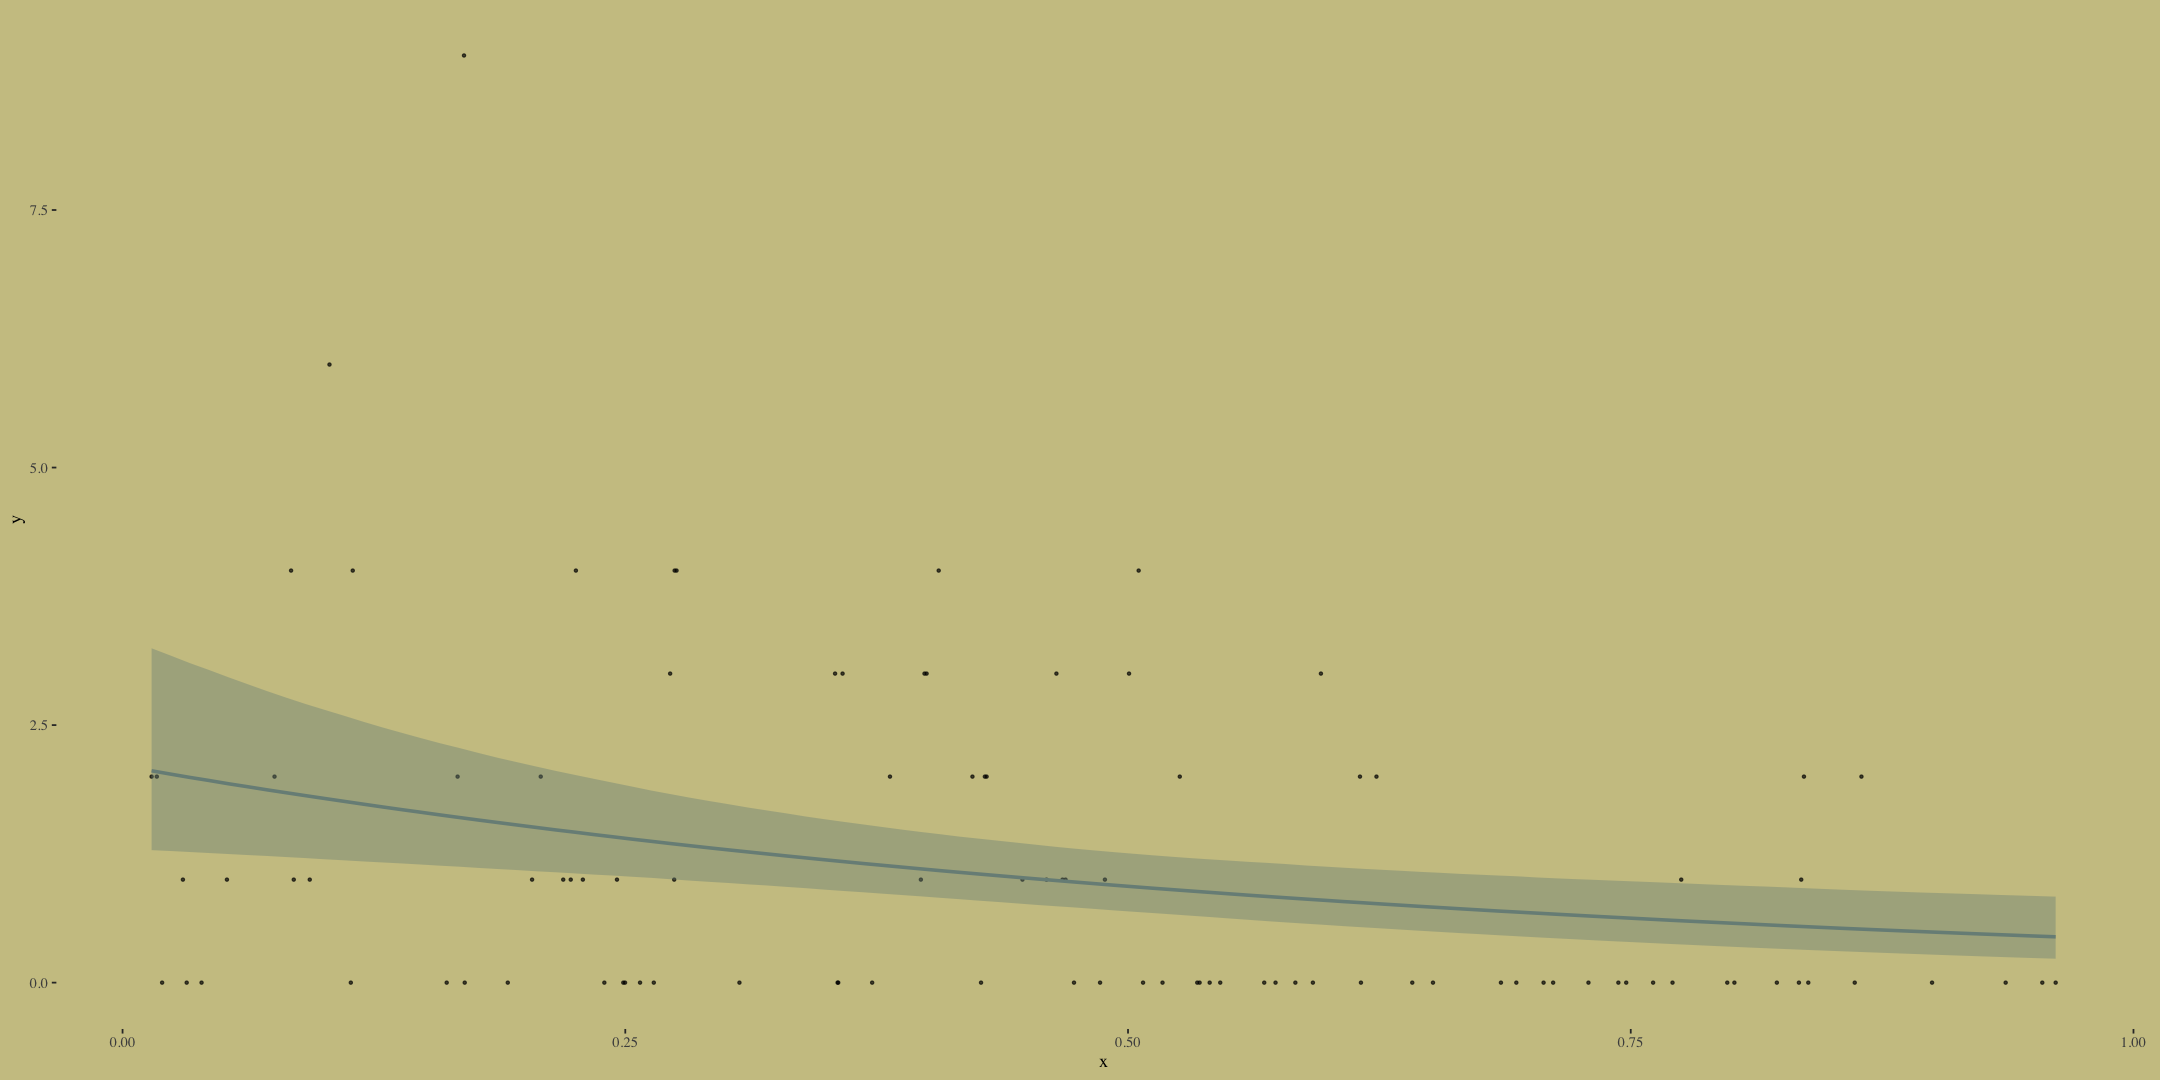

In [209]:
plot(marginal_effects(b10.18),
     points = T,
     point_args = c(size = 3/5, alpha = 2/3),
     line_args  = c(color = wes_palette("Moonrise2")[1],
                    fill  = wes_palette("Moonrise2")[1]))

In [210]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.3

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] zh_CN.UTF-8/zh_CN.UTF-8/zh_CN.UTF-8/C/zh_CN.UTF-8/zh_CN.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tidybayes_2.0.2      loo_2.2.0            broom_0.5.5         
 [4] wesanderson_0.3.6    forcats_0.5.0        stringr_1.4.0       
 [7] dplyr_0.8.5          purrr_0.3.3          readr_1.3.1         
[10] tidyr_1.0.2          tibble_2.1.3         tidyverse_1.3.0     
[13] bayesplot_1.7.1      ggthemes_4.2.0       brms_2.12.0         
[16] Rcpp_1.0.4           dagitty_0.2-2        rstan_2.19.3        
[19] ggplot2_3.3.0        StanHeaders_2.21.0-1 repr_1.1.0          

loa